# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

Propnex is a real estate company in Ames, Iowa. Being part of the data science team, I have been tasked to create regression models based on Ames Housing dataset from 2006 to 2010 to predict the price of house at sale in Ames, Iowa. <br><br>
More than often, homeowners are unfamiliar with how much can their house fetch in the market and what are the factors that influence the house sale price. I hope to provide clear insights so they can have an estimate of their house price. And if the sale price is not ideal, they can consider to make improvements to their house based on the key variables.<br><br>
I will use different regression models and see which model is the best at predicting the sale price and narrow down the key variables that homeowners should look out for. I will evaluate my model based on the r2 score for both train and validation date and cross validation score. If all 3 scores are high (above 0.9) and very close to each other, I will deem it as a good model.<br><br>
By selecting the best model, it will be helpful to homeowners to understand:
- what are the key features that can positively or negatively affect the sale price
- given the current state of their house, what is the expected sale price

## Background

Ames housing data contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The data has 81 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables, and the Sale Price.

## Datasets:
- train.csv: train data with all columns including sale price for modelling
- test.csv: test data with all columns except sale price that I'm trying to predict

## Importing libraries

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statistics

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

## Load train data

In [2]:
# Read in data.
housing_train = pd.read_csv('../data/train.csv')

# Examine first five rows of train data
housing_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
# replace single spacing and '/' with underscore for all column headers
housing_train.columns = housing_train.columns.str.replace(' ', '_').str.replace('/', '_')
housing_train.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Data cleaning: Initial check

In [4]:
# check number of rows and columns
housing_train.shape

(2051, 81)

In [5]:
# check out the data
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS_SubClass      2051 non-null   int64  
 3   MS_Zoning        2051 non-null   object 
 4   Lot_Frontage     1721 non-null   float64
 5   Lot_Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot_Shape        2051 non-null   object 
 9   Land_Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot_Config       2051 non-null   object 
 12  Land_Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition_1      2051 non-null   object 
 15  Condition_2      2051 non-null   object 
 16  Bldg_Type        2051 non-null   object 
 17  House_Style   

<AxesSubplot:>

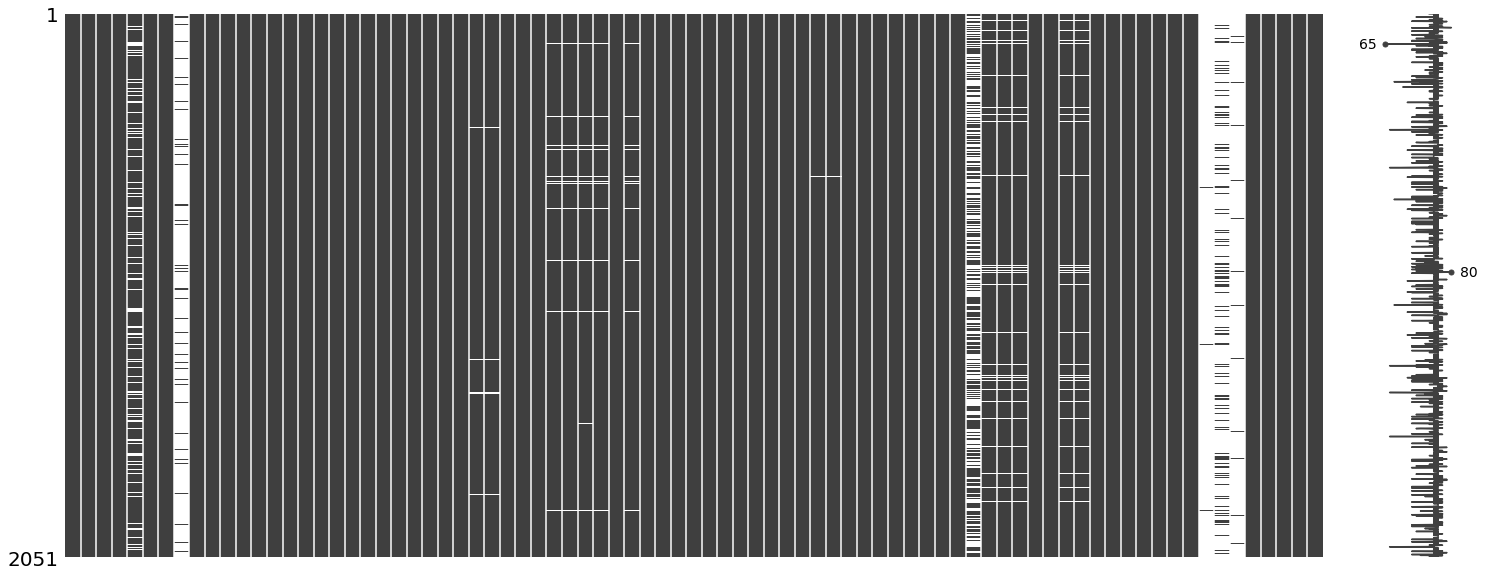

In [6]:
# visualise missing values for each column
msno.matrix(housing_train)

In [7]:
# create a function to specify the number of missing values, percentage and column type
def column_with_nan(df):
    df1 = df.isnull().sum().sort_values(ascending=False).to_frame() 
    df1.columns = ['count']
    df2 = (df.isnull().sum()/len(df)).to_frame()*100
    df2.columns = ['pct']
    df3 = df.dtypes.to_frame()
    df3.columns = ['column_type']
    return  df1.join(df2).join(df3)

In [8]:
# pass through train data in the function
missing_dataframe_train = column_with_nan(housing_train)
missing_dataframe_train

,count,pct,column_type
Pool_QC,2042,99.561190,object
Misc_Feature,1986,96.830814,object
Alley,1911,93.174061,object
Fence,1651,80.497318,object
Fireplace_Qu,1000,48.756704,object
...,...,...,...
Electrical,0,0.000000,object
Central_Air,0,0.000000,object
Heating_QC,0,0.000000,object
Sale_Type,0,0.000000,object


### Categorical column with null values

In [9]:
# create a function to get all the categorical columns that have null values
# And then replace Mas_Vnr_Type's missing values with 'missing', Electrical with mode, and the rest of the categorical columns' missing values with 'None' based on the data dictionary
def categorical_null_treatment(df, missing_dataframe):
    df['Mas_Vnr_Type'].fillna('missing', inplace=True)
    df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
    cat_columns_replace = missing_dataframe[(missing_dataframe['column_type']=='object') & missing_dataframe['pct']>0].index.to_list()
    print(cat_columns_replace)
    for feature in cat_columns_replace:
        df[feature].fillna("None", inplace=True)
    return df

In [10]:
# pass through the train data in the function
housing_train = categorical_null_treatment(housing_train, missing_dataframe_train)

['Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Fireplace_Qu', 'Garage_Finish', 'Garage_Cond', 'Garage_Qual', 'Garage_Type', 'Bsmt_Exposure', 'BsmtFin_Type_2', 'BsmtFin_Type_1', 'Bsmt_Cond', 'Bsmt_Qual', 'Mas_Vnr_Type']


The above columns are the categorical variables that have null values. I have replaced it with 'None' based on my understanding of the data dictionary that they are valid inputs that indicate the house does not have the variable while for Mas_Vnr_Type, the values are really missing therefore I input the value 'missing'. For Electrical column, there's 1 missing value in the test dataset therefore I replace with mode for ease of imputing.

### Numerical column with null values

In [11]:
# create a function to get all the numerical columns that have null values
# then replace the missing value with the zero 
def numerical_null_treatment(train_df, df, missing_dataframe):
    num_columns_replace = missing_dataframe[(missing_dataframe['column_type']!='object') & missing_dataframe['pct']>0].index.to_list()
    print(num_columns_replace)
    for feature in num_columns_replace:
          df[feature].fillna(0, inplace=True)
        # column_median = train_df[feature][~train_df[feature].isna()].median()
        # print(f'{feature} - value:{}')
        # df[feature].fillna(column_median, inplace=True)
    return df 

In [12]:
# pass through the train data in the function
housing_train = numerical_null_treatment(housing_train, housing_train, missing_dataframe_train)

['Lot_Frontage', 'Garage_Yr_Blt', 'Mas_Vnr_Area', 'Bsmt_Half_Bath', 'Bsmt_Full_Bath', 'Garage_Cars', 'Garage_Area', 'Bsmt_Unf_SF', 'BsmtFin_SF_2', 'Total_Bsmt_SF', 'BsmtFin_SF_1']


The above variables are the numerical variables that have null values.  I have replaced all missing values with 0 as I tried looking at the NA values for Garage Year Built, Garage Cars and Garage Area, the Garage Type is no garage (NA in the beginning) therefore these 3 numerical column have missing values. <br>Since there's no garage, these 3 columns should be 0. I noticed the same for Basement Full bath, half bath etc as well.
As such, I will impute all missing values with 0 as I belive there were 0 to start with that's why it appear as null value in the dataset.

In [13]:
# check all columns again to ensure there's no null values
housing_train.isnull().sum()

Id              0
PID             0
MS_SubClass     0
MS_Zoning       0
Lot_Frontage    0
               ..
Misc_Val        0
Mo_Sold         0
Yr_Sold         0
Sale_Type       0
SalePrice       0
Length: 81, dtype: int64

### Correcting values

In [14]:
housing_train['Garage_Yr_Blt'].describe()

count    2051.000000
mean     1868.725987
std       454.133654
min         0.000000
25%      1957.000000
50%      1978.000000
75%      2001.000000
max      2207.000000
Name: Garage_Yr_Blt, dtype: float64

In [15]:
# replace the value for Garage year built from 2207 to 2007
housing_train['Garage_Yr_Blt'].replace([2207, 2007], inplace = True)

### Type of Columns

I have categorised the variables based on nominal, ordinal, discrete and continuous to get a clearer picture.

In [16]:
nominal_columns = ['PID', 'MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Land_Contour', 'Lot_Config', 'Neighborhood',
                   'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
                   'Exterior_2nd', 'Mas_Vnr_Type', 'Foundation', 'Heating', 'Central_Air', 'Garage_Type', 
                   'Misc_Feature', 'Sale_Type']

In [17]:
ordinal_columns = ['Lot_Shape', 'Utilities', 'Land_Slope', 'Overall_Qual', 'Overall_Cond', 'Exter_Qual', 'Exter_Cond',
                   'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC', 
                   'Electrical', 'Kitchen_Qual', 'Functional', 'Fireplace_Qu', 'Garage_Finish', 'Garage_Qual', 
                   'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence']

In [18]:
discrete_columns = ['Year_Built', 'Year_Remod_Add', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 
                    'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Yr_Blt', 'Garage_Cars', 
                    'Mo_Sold', 'Yr_Sold']

In [19]:
continuous_columns = ['Lot_Frontage', 'Lot_Area', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 
                      'Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Garage_Area', 
                      'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 
                      'Misc_Val', 'SalePrice']

After looking at the relationship between discrete variables and Sale price, I noticed that **Year_Built**, **Year_Remod_Add** and **Garage_Yr_Blt** has a linear relationship to SalePrice, while the rest does not have. Therefore, I will add these 3 variables to continuous variables, while the rest will be added to ordinal variables.

In [20]:
ordinal_columns_revised = ['Lot_Shape', 'Utilities', 'Land_Slope', 'Overall_Qual', 'Overall_Cond', 'Exter_Qual', 'Exter_Cond',
                            'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC', 
                            'Electrical', 'Kitchen_Qual', 'Functional', 'Fireplace_Qu', 'Garage_Finish', 'Garage_Qual', 
                            'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 
                           'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 
                           'Mo_Sold', 'Yr_Sold']

In [21]:
continuous_columns_revised = ['Lot_Frontage', 'Lot_Area', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 
                      'Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Garage_Area', 
                      'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 
                      'Misc_Val', 'SalePrice', 'Year_Built', 'Year_Remod_Add', 'Garage_Yr_Blt']

In [22]:
# check the number of columns 
print(len(nominal_columns))
print(len(ordinal_columns_revised))
print(len(continuous_columns_revised))

23
34
23


## Load Test data

In [23]:
# Read in data
housing_test = pd.read_csv('../data/test.csv')

# Examine first five rows of train data
housing_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [24]:
# replace single spacing and '/' with underscore for all column headers
housing_test.columns = housing_test.columns.str.replace(' ', '_').str.replace('/', '_')
housing_test.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Data cleaning: Initial check

In [25]:
# check number of rows and columns
housing_test.shape

(878, 80)

In [26]:
# check out the data
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS_SubClass      878 non-null    int64  
 3   MS_Zoning        878 non-null    object 
 4   Lot_Frontage     718 non-null    float64
 5   Lot_Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot_Shape        878 non-null    object 
 9   Land_Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot_Config       878 non-null    object 
 12  Land_Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition_1      878 non-null    object 
 15  Condition_2      878 non-null    object 
 16  Bldg_Type        878 non-null    object 
 17  House_Style     

<AxesSubplot:>

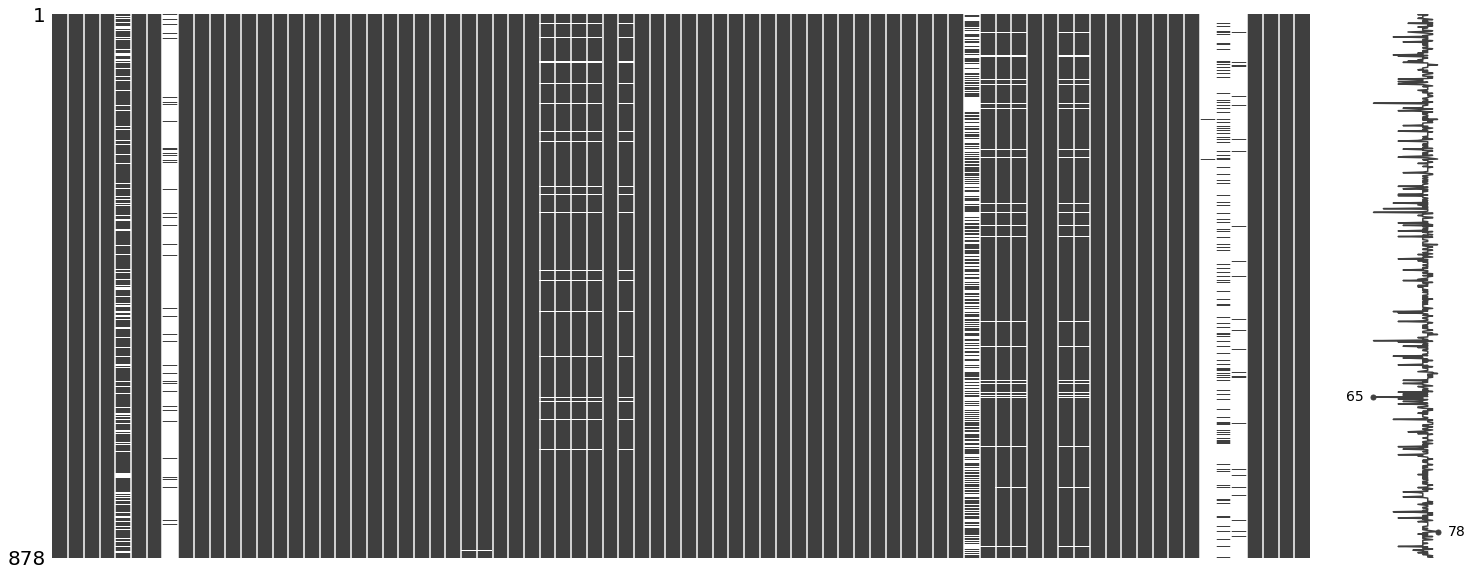

In [27]:
# visualise missing values for each column
msno.matrix(housing_test)

In [28]:
# using the function created earlier, pass through test data to check the count of missing values, percentage and the column type
missing_dataframe_test = column_with_nan(housing_test)
missing_dataframe_test

,count,pct,column_type
Pool_QC,874,99.544419,object
Misc_Feature,837,95.330296,object
Alley,820,93.394077,object
Fence,706,80.410023,object
Fireplace_Qu,422,48.063781,object
...,...,...,...
Heating_QC,0,0.000000,object
Heating,0,0.000000,object
Yr_Sold,0,0.000000,int64
Bsmt_Unf_SF,0,0.000000,int64


### Categorical column with null values

In [29]:
# using the function created earlier, pass through test data to get all the categorical columns that have null values
# This will replace Mas_Vnr_Type's missing values with 'missing' if there is, Electrical's missing value with mode and the rest of the categorical columns' missing values with 'None' 
housing_test = categorical_null_treatment(housing_test, missing_dataframe_test)

['Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Fireplace_Qu', 'Garage_Cond', 'Garage_Qual', 'Garage_Finish', 'Garage_Type', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'Bsmt_Qual', 'BsmtFin_Type_2', 'Bsmt_Cond', 'Mas_Vnr_Type', 'Electrical']


### Numerical column with null values

In [30]:
# using the function created earlier, pass through test data to get all the numerical columns that have null values
# this will replace the missing value with 0
housing_test = numerical_null_treatment(housing_train, housing_test, missing_dataframe_test)

['Lot_Frontage', 'Garage_Yr_Blt', 'Mas_Vnr_Area']


In [31]:
# check all columns again to ensure there's no null values
housing_test.isnull().sum().sort_values()

Id                0
Fireplaces        0
Functional        0
TotRms_AbvGrd     0
Kitchen_Qual      0
                 ..
Roof_Matl         0
Roof_Style        0
Year_Remod_Add    0
Yr_Sold           0
Sale_Type         0
Length: 80, dtype: int64

## Concatenate Train and Test dataframe

In [32]:
# insert a new column - SalePrice in test data with NaN values
housing_test['SalePrice'] = np.nan

In [33]:
# ensure test data has same sequence of columns as train data
housing_test = housing_test[housing_train.columns]

In [34]:
# concatenate both train and test data
df_concat = pd.concat([housing_train, housing_test])

In [35]:
# check the rows and columns
df_concat.shape

(2929, 81)

### Assign numerical values to ordinal categories

In [36]:
# create a dictionary to input numerical values based on data dictionary 
ordinal_mapping_dict = dict(Lot_Shape = {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0},
                          Utilities = {'AllPub':2, 'NoSewr':1, 'NoSeWa':0},
                          Land_Slope = {'Gtl':2, 'Mod':1, 'Sev':0},
                          Exter_Qual = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
                          Exter_Cond = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
                          Bsmt_Qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0},
                          Bsmt_Cond = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0},
                          Bsmt_Exposure = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0},
                          BsmtFin_Type_1 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0},
                          BsmtFin_Type_2 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0},
                          Heating_QC = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
                          Kitchen_Qual = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
                          Electrical = {'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0},
                          Garage_Qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0},
                          Garage_Cond = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0},
                          Fireplace_Qu = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0},
                          Functional = {'Typ':7, 'Min1':6,'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
                          Garage_Finish = {'Fin':3, 'RFn':2, 'Unf':1, 'None':0},
                          Paved_Drive = {'Y':2, 'P':1, 'N':0},
                          Pool_QC = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0},
                          Fence = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})

In [37]:
# map the dictionary into the dataframe to replace the values except for Overall_Cond and Overall_Qual as they are already in numeerical values
for col_name in ordinal_columns: 
    if col_name != 'Overall_Cond' and col_name != 'Overall_Qual':
        df_concat[col_name] = df_concat[col_name].map(ordinal_mapping_dict[col_name])

In [38]:
# check the dataframe
df_concat.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,None,2,Lvl,...,0,0,0,0,None,0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,None,2,Lvl,...,0,0,0,0,None,0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.0,7922,Pave,None,3,Lvl,...,0,0,0,0,None,0,1,2010,WD,109000.0
3,318,916386060,60,RL,73.0,9802,Pave,None,3,Lvl,...,0,0,0,0,None,0,4,2010,WD,174000.0
4,255,906425045,50,RL,82.0,14235,Pave,None,2,Lvl,...,0,0,0,0,None,0,3,2010,WD,138500.0


### Convert columns' datatype

I will convert the columns to the right datatypes so the modelling will work correctly.

In [39]:
# check nominal columns datatypes
df_concat[nominal_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PID           2929 non-null   int64 
 1   MS_SubClass   2929 non-null   int64 
 2   MS_Zoning     2929 non-null   object
 3   Street        2929 non-null   object
 4   Alley         2929 non-null   object
 5   Land_Contour  2929 non-null   object
 6   Lot_Config    2929 non-null   object
 7   Neighborhood  2929 non-null   object
 8   Condition_1   2929 non-null   object
 9   Condition_2   2929 non-null   object
 10  Bldg_Type     2929 non-null   object
 11  House_Style   2929 non-null   object
 12  Roof_Style    2929 non-null   object
 13  Roof_Matl     2929 non-null   object
 14  Exterior_1st  2929 non-null   object
 15  Exterior_2nd  2929 non-null   object
 16  Mas_Vnr_Type  2929 non-null   object
 17  Foundation    2929 non-null   object
 18  Heating       2929 non-null   object
 19  Central

In [40]:
# convert nominal columns to string type
df_concat[nominal_columns] = df_concat[nominal_columns].astype('object')

In [41]:
# check the datatype is changed correctly
df_concat[nominal_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PID           2929 non-null   object
 1   MS_SubClass   2929 non-null   object
 2   MS_Zoning     2929 non-null   object
 3   Street        2929 non-null   object
 4   Alley         2929 non-null   object
 5   Land_Contour  2929 non-null   object
 6   Lot_Config    2929 non-null   object
 7   Neighborhood  2929 non-null   object
 8   Condition_1   2929 non-null   object
 9   Condition_2   2929 non-null   object
 10  Bldg_Type     2929 non-null   object
 11  House_Style   2929 non-null   object
 12  Roof_Style    2929 non-null   object
 13  Roof_Matl     2929 non-null   object
 14  Exterior_1st  2929 non-null   object
 15  Exterior_2nd  2929 non-null   object
 16  Mas_Vnr_Type  2929 non-null   object
 17  Foundation    2929 non-null   object
 18  Heating       2929 non-null   object
 19  Central

In [42]:
# check the datatype of continuous variables
df_concat[continuous_columns_revised].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot_Frontage     2929 non-null   float64
 1   Lot_Area         2929 non-null   int64  
 2   Mas_Vnr_Area     2929 non-null   float64
 3   BsmtFin_SF_1     2929 non-null   float64
 4   BsmtFin_SF_2     2929 non-null   float64
 5   Bsmt_Unf_SF      2929 non-null   float64
 6   Total_Bsmt_SF    2929 non-null   float64
 7   1st_Flr_SF       2929 non-null   int64  
 8   2nd_Flr_SF       2929 non-null   int64  
 9   Low_Qual_Fin_SF  2929 non-null   int64  
 10  Gr_Liv_Area      2929 non-null   int64  
 11  Garage_Area      2929 non-null   float64
 12  Wood_Deck_SF     2929 non-null   int64  
 13  Open_Porch_SF    2929 non-null   int64  
 14  Enclosed_Porch   2929 non-null   int64  
 15  3Ssn_Porch       2929 non-null   int64  
 16  Screen_Porch     2929 non-null   int64  
 17  Pool_Area      

In [43]:
# check the datatype of ordinal variables
df_concat[ordinal_columns_revised].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot_Shape       2929 non-null   int64  
 1   Utilities       2929 non-null   int64  
 2   Land_Slope      2929 non-null   int64  
 3   Overall_Qual    2929 non-null   int64  
 4   Overall_Cond    2929 non-null   int64  
 5   Exter_Qual      2929 non-null   int64  
 6   Exter_Cond      2929 non-null   int64  
 7   Bsmt_Qual       2929 non-null   int64  
 8   Bsmt_Cond       2929 non-null   int64  
 9   Bsmt_Exposure   2929 non-null   int64  
 10  BsmtFin_Type_1  2929 non-null   int64  
 11  BsmtFin_Type_2  2929 non-null   int64  
 12  Heating_QC      2929 non-null   int64  
 13  Electrical      2929 non-null   int64  
 14  Kitchen_Qual    2929 non-null   int64  
 15  Functional      2929 non-null   int64  
 16  Fireplace_Qu    2929 non-null   int64  
 17  Garage_Finish   2929 non-null   in

In [44]:
# convert all ordinal_columns_revised types to integer
df_concat[ordinal_columns_revised] = df_concat[ordinal_columns_revised].astype('int')

In [45]:
# # check the datatype is changed correctly
df_concat[ordinal_columns_revised].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot_Shape       2929 non-null   int64
 1   Utilities       2929 non-null   int64
 2   Land_Slope      2929 non-null   int64
 3   Overall_Qual    2929 non-null   int64
 4   Overall_Cond    2929 non-null   int64
 5   Exter_Qual      2929 non-null   int64
 6   Exter_Cond      2929 non-null   int64
 7   Bsmt_Qual       2929 non-null   int64
 8   Bsmt_Cond       2929 non-null   int64
 9   Bsmt_Exposure   2929 non-null   int64
 10  BsmtFin_Type_1  2929 non-null   int64
 11  BsmtFin_Type_2  2929 non-null   int64
 12  Heating_QC      2929 non-null   int64
 13  Electrical      2929 non-null   int64
 14  Kitchen_Qual    2929 non-null   int64
 15  Functional      2929 non-null   int64
 16  Fireplace_Qu    2929 non-null   int64
 17  Garage_Finish   2929 non-null   int64
 18  Garage_Qual     2929 non-null

### Drop columns before train-test-split

In [46]:
# drop ID and PID as they are not important features to predict SalePrice
df_concat.drop(['Id', 'PID'], axis=1, inplace=True)

### Convert to dummy variables

In [47]:
# check out nominal columns
nominal_columns

['PID',
 'MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Land_Contour',
 'Lot_Config',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Foundation',
 'Heating',
 'Central_Air',
 'Garage_Type',
 'Misc_Feature',
 'Sale_Type']

In [48]:
# convert nominal column to dummy variables except for 'PID' since I have dropped it
df_concat_dummy = pd.get_dummies(df_concat, columns = nominal_columns[1:])

In [49]:
# check the number of rows and columns
df_concat_dummy.shape

(2929, 242)

In [50]:
# check the first 5 rows
df_concat_dummy.head()

,Lot_Frontage,Lot_Area,Lot_Shape,Utilities,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,...,Sale_Type_COD,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD
0,0.0,13517,2,2,2,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,2,2,2,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,3,2,2,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,73.0,9802,3,2,2,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,82.0,14235,2,2,2,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# extract test data from the full dataframe
housing_test_dummy = df_concat_dummy[df_concat_dummy['SalePrice'].isna()]

In [52]:
# check the number of rows and columns
housing_test_dummy.shape

(878, 242)

In [53]:
# drop SalePrice column since it's the dependent variable
housing_test_dummy = housing_test_dummy.drop(['SalePrice'], axis=1)

# check the shape again
housing_test_dummy.shape

(878, 241)

In [54]:
# get the dataset of train data
housing_train_dummy = df_concat_dummy[~df_concat_dummy['SalePrice'].isna()]

In [55]:
# check the number of rows and columns
housing_train_dummy.shape

(2051, 242)

## Modelling

### Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [56]:
X = housing_train_dummy.drop(['SalePrice'], axis=1)
y = housing_train_dummy['SalePrice']

### Baseline score via Linear Regression

In [57]:
# instantiate linear regression model
lr = LinearRegression()

In [58]:
# get baseline score of the train data
cross_val_score(lr, X, y, cv=5).mean()

0.8455934940668118

Looing at the cross validation score of the entire train dataset, as the score is pretty high at 0.85, we can tell that the current model does a decent job in predicting Sale price. But we will need to further do modelling and see if this score can be improved further.

### Train-test-split / Linear Regression

In [59]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# instantiate StandardScaler
ss = StandardScaler()

# fit and scale X_train, and scale X_test 
X_train_sc = ss.fit_transform(X_train)
X_test_sc  = ss.transform(X_test)

In [61]:
# fit model
lr.fit(X_train_sc, y_train)

LinearRegression()

In [62]:
# train and test score
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.9329940844410094
-2.367940515518044e+22


In [63]:
# use cross-validation folds
cross_val_score(lr, X_train_sc, y_train, cv=10).mean()

-3.4045106558934744e+25

Based on the scores, we can see the train data is severely overfitting compared to the test data. This is probably due to too much noise in the data as we have 241 columns in X train. <br>Therefore, I will use L1 regularisation - Lasso regression to reduce the noise by eliminating features (shrinking the coefficients to 0), and improve the overfitting situation. This also helps to remove multi-collinear features.

### Lasso regression

In [64]:
# create a range of alpha values to check
l_alpha = np.logspace(-1, 3, 100)

# Cross-validate over the list of alphas
lasso_cv = LassoCV(alphas = l_alpha, cv=5, max_iter=200000)

# fit model using the best lasso alpha
lasso_cv.fit(X_train_sc, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.09749877e-01, 1.20450354e-01, 1.32194115e-01,
       1.45082878e-01, 1.59228279e-01, 1.74752840e-01, 1.91791026e-01,
       2.10490414e-01, 2.31012970e-01, 2.53536449e-01, 2.78255940e-01,
       3.05385551e-01, 3.35160265e-01, 3.67837977e-01, 4.03701726e-01,
       4.43062146e-01, 4.86260158e-01, 5.33669923e-01, 5.85702082e-01,
       6.42807312e-01, 7.05480231e-0...
       1.17681195e+02, 1.29154967e+02, 1.41747416e+02, 1.55567614e+02,
       1.70735265e+02, 1.87381742e+02, 2.05651231e+02, 2.25701972e+02,
       2.47707636e+02, 2.71858824e+02, 2.98364724e+02, 3.27454916e+02,
       3.59381366e+02, 3.94420606e+02, 4.32876128e+02, 4.75081016e+02,
       5.21400829e+02, 5.72236766e+02, 6.28029144e+02, 6.89261210e+02,
       7.56463328e+02, 8.30217568e+02, 9.11162756e+02, 1.00000000e+03]),
        cv=5, max_iter=200000)

In [65]:
# r2 score of train and test data
print(lasso_cv.score(X_train_sc, y_train))
print(lasso_cv.score(X_test_sc, y_test))

0.9198015172638314
0.9092784313524709


In [66]:
# check cross validation score
cross_val_score(lasso_cv, X_train_sc, y_train, cv=5).mean()

0.8287773044989972

In [67]:
# check the optimal value of alpha
lasso_cv.alpha_

911.1627561154896

In [68]:
# check out the coefficients of features
lasso_cv.coef_[:10]

array([  615.60583072,  4941.57382512,    -0.        ,     0.        ,
         -30.29717015, 12688.88953985,  2906.93742084,  6529.98959283,
        1843.50390546,  5174.80651995])

Based on Lasso regression, the r2 score of train data is slightly higher than test data by 0.02 which means there might be slight overfitting.

### Lasso Coefficients 

In [69]:
# create a dataframe to store the variables, coefficient and the absolute coefficients
lasso_coefs = pd.DataFrame({'variable': X.columns,
                            'coef': lasso_cv.coef_,
                            'abs_coef': np.abs(lasso_cv.coef_),
                           })
                        
# sort values by absolute coefficients values in descending order
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

# check out the first 5 variables
lasso_coefs.head()

,variable,coef,abs_coef
26,Gr_Liv_Area,23373.897980,23373.897980
157,Roof_Matl_ClyTile,-14523.595918,14523.595918
5,Overall_Qual,12688.889540,12688.889540
225,Misc_Feature_Elev,-11750.416864,11750.416864
16,BsmtFin_SF_1,9358.559113,9358.559113


In [70]:
# create a list to store all the variables that have coefficient = 0
lasso_col_drop = lasso_coefs[lasso_coefs['abs_coef'] == 0 ]['variable'].tolist()
lasso_col_drop[:10]

['Sale_Type_ConLD',
 'Heating_Wall',
 'Heating_GasW',
 'Exterior_1st_AsphShn',
 'House_Style_2Story',
 'Heating_GasA',
 'Sale_Type_ConLI',
 'Heating_Floor',
 'Sale_Type_CWD',
 'Misc_Feature_TenC']

In [71]:
# check how many variables that have coefficients =0 and not equal to 0
print(len(lasso_coefs[lasso_coefs['abs_coef'] != 0]))
print(len(lasso_col_drop))

83
158


### Feature engineering

In [72]:
# create a copy of df_concat_dummy to do feature engineering
df_concat_dummy_eng = df_concat_dummy.copy()

In [73]:
# check the number of rows and columns
df_concat_dummy_eng.shape

(2929, 242)

In [74]:
# drop the columns
df_concat_dummy_eng = df_concat_dummy_eng.drop(columns=lasso_col_drop, axis=1)

# check the number of rows and columm after columns are dropped
df_concat_dummy_eng.shape

(2929, 84)

In [75]:
# create new features to test if the model will be better
df_concat_dummy_eng['Gr_Liv_Area_Overall_Qual'] = df_concat_dummy_eng['Gr_Liv_Area'] * df_concat_dummy_eng['Overall_Qual']
df_concat_dummy_eng['Overall_Qual_Exter_Qual'] = df_concat_dummy_eng['Overall_Qual'] * df_concat_dummy_eng['Exter_Qual']
df_concat_dummy_eng['Gr_Liv_Area_BsmtFin_SF_1'] = df_concat_dummy_eng['Gr_Liv_Area'] * df_concat_dummy_eng['BsmtFin_SF_1']
df_concat_dummy_eng['Gr_Liv_Area_Kitchen_Qual'] = df_concat_dummy_eng['Gr_Liv_Area'] * df_concat_dummy_eng['Kitchen_Qual']
df_concat_dummy_eng['Overall_Qual_Kitchen_Qual'] = df_concat_dummy_eng['Overall_Qual'] * df_concat_dummy_eng['Kitchen_Qual']

I have created 5 new features based on the variables and their coefficients earlier. I picked those variables that have high coefficients as there's likely possibility it might be a potential interaction feature that will influence the sale price.
- **Gr_Liv_Area_Overall_Qual** - interaction between Gr_Liv_Area and Overall_Qual
-   **Overall_Qual_Exter_Qual** - interaction between Overall_Qual and Exter_Qual
-   **Gr_Liv_Area_BsmtFin_SF_1** - interaction between Gr_Liv_Area and BsmtFin_SF_1
-  **Gr_Liv_Area_Kitchen_Qual** - interaction between Gr_Liv_Area and Kitchen_Qual
-  **Overall_Qual_Kitchen_Qual** - interaction between Overall_Qual and Kitchen_Qual

In [76]:
_# check out the new features
df_concat_dummy_eng[['Gr_Liv_Area_Overall_Qual', 'Overall_Qual_Exter_Qual', 'Gr_Liv_Area_BsmtFin_SF_1', 
                     'Gr_Liv_Area_Kitchen_Qual', 'Overall_Qual_Kitchen_Qual']].head()

,Gr_Liv_Area_Overall_Qual,Overall_Qual_Exter_Qual,Gr_Liv_Area_BsmtFin_SF_1,Gr_Liv_Area_Kitchen_Qual,Overall_Qual_Kitchen_Qual
0,8874,18,788307.0,4437,18
1,14854,21,1351714.0,6366,21
2,5285,10,772667.0,3171,15
3,7220,10,0.0,2888,10
4,8670,12,0.0,2890,12


In [77]:
# extract train data from the full dataframe
housing_train_dummy_eng = df_concat_dummy_eng[~df_concat_dummy_eng['SalePrice'].isna()]

In [78]:
# extract test data from the full dataframe
housing_test_dummy_eng = df_concat_dummy_eng[df_concat_dummy_eng['SalePrice'].isna()]

# drop SalePrice column since it's the dependent variable
housing_test_dummy_eng = housing_test_dummy_eng.drop(['SalePrice'], axis=1)

In [79]:
# check the number of rows and columns
print(housing_train_dummy_eng.shape)
print(housing_test_dummy_eng.shape)

(2051, 89)
(878, 88)


### Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [80]:
X_lasso = housing_train_dummy_eng.drop(['SalePrice'], axis=1)
y_lasso = housing_train_dummy_eng['SalePrice']

In [81]:
# check the rows and columns
X_lasso.shape

(2051, 88)

### Train-test split

In [82]:
# split into train and test data
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_lasso, y_lasso, random_state=42)

In [83]:
# def func_name(input1,input2):
#   # do your stuff here
#   return return1, return2

In [84]:
# fit and scale X_train, scale X_test other for those columns that I have filtered out
X_train_eng_sc = ss.fit_transform(X_train_eng)
X_test_eng_sc = ss.transform(X_test_eng)

### Using Lasso regression again

In [85]:
# Set up a list of Lasso alphas to check.
l_alpha_eng = np.logspace(-1, 3, 1000)

# Cross-validate over our list of Lasso alphas.
lasso_cv_eng = LassoCV(alphas = l_alpha_eng, cv=5, max_iter=200000)

# Fit model using best ridge alpha
lasso_cv_eng.fit(X_train_eng_sc, y_train_eng)

LassoCV(alphas=array([1.00000000e-01, 1.00926219e-01, 1.01861017e-01, 1.02804473e-01,
       1.03756668e-01, 1.04717682e-01, 1.05687597e-01, 1.06666496e-01,
       1.07654461e-01, 1.08651577e-01, 1.09657929e-01, 1.10673602e-01,
       1.11698682e-01, 1.12733256e-01, 1.13777413e-01, 1.14831241e-01,
       1.15894830e-01, 1.16968270e-01, 1.18051653e-01, 1.19145070e-01,
       1.20248614e-01, 1.21362380e-0...
       8.08924349e+02, 8.16416760e+02, 8.23978568e+02, 8.31610415e+02,
       8.39312950e+02, 8.47086827e+02, 8.54932707e+02, 8.62851257e+02,
       8.70843150e+02, 8.78909065e+02, 8.87049689e+02, 8.95265713e+02,
       9.03557835e+02, 9.11926760e+02, 9.20373200e+02, 9.28897872e+02,
       9.37501502e+02, 9.46184819e+02, 9.54948564e+02, 9.63793480e+02,
       9.72720319e+02, 9.81729841e+02, 9.90822810e+02, 1.00000000e+03]),
        cv=5, max_iter=200000)

In [86]:
# r2 score of train and test data
print(lasso_cv_eng.score(X_train_eng_sc, y_train_eng))
print(lasso_cv_eng.score(X_test_eng_sc, y_test_eng))

0.9296316335079023
0.9207208391562246


In [87]:
# cross val score
cross_val_score(lasso_cv_eng, X_train_eng_sc, y_train_eng, cv=5).mean()

0.752178435927492

In [88]:
# check the optimal value of alpha
lasso_cv_eng.alpha_

1000.0

### Lasso predictions

In [89]:
# scale test data
housing_test_dummy_eng_sc = ss.transform(housing_test_dummy_eng)

# predict SalePrice in test data
lasso_predict_y = lasso_cv_eng.predict(housing_test_dummy_eng_sc).tolist()

# check the values
lasso_predict_y[:10]

[137088.6480244106,
 156512.09453554265,
 230076.7274284979,
 113222.36329367038,
 175564.53559933713,
 89261.59134800533,
 104426.50957055624,
 148630.11561529516,
 184183.60909636752,
 160849.33036790078]

In [90]:
# create a dataframe to store 'Id' and 'SalePrice'
lasso_predict = pd.DataFrame({'Id': housing_test['Id'],
                              'SalePrice' : lasso_predict_y})

In [91]:
# set 'Id' as the index
lasso_predict.set_index('Id', inplace=True)

# check the first 5 rows
lasso_predict.head()

,SalePrice
Id,
2658,137088.648024
2718,156512.094536
2414,230076.727428
1989,113222.363294
625,175564.535599


In [93]:
# export the dataframe to csv file 
lasso_predict.to_csv('../data/submission_lasso.csv')

### Lasso coefficients

In [94]:
# check out the coefficients of features
lasso_cv_eng.coef_[:10]

array([ 482.85835767, 5295.5465016 ,   -0.        ,    0.        ,
       2600.1638653 , 5880.43475808, 1842.4455859 , 2848.47399434,
          0.        ,   -0.        ])

In [95]:
# create a dataframe to store the variables, coefficient and the absolute coefficients
lasso_coefs_eng = pd.DataFrame({'variable': X_lasso.columns,
                            'coef': lasso_cv_eng.coef_,
                            'abs_coef': np.abs(lasso_cv_eng.coef_),
                           })
                        
# sort values by absolute coefficients values in descending order
lasso_coefs_eng.sort_values('abs_coef', inplace=True, ascending=False)

# check the first 10 variables
lasso_coefs_eng.head()

,variable,coef,abs_coef
83,Gr_Liv_Area_Overall_Qual,27729.201414,27729.201414
57,Roof_Matl_ClyTile,-17411.573691,17411.573691
77,Misc_Feature_Elev,-13957.676741,13957.676741
86,Gr_Liv_Area_Kitchen_Qual,11973.482748,11973.482748
84,Overall_Qual_Exter_Qual,10563.943569,10563.943569


In [96]:
# create a list for the variables that have coefficient = 0
lasso_col_drop_eng = lasso_coefs_eng[lasso_coefs_eng['abs_coef'] == 0 ]['variable'].tolist()
lasso_col_drop_eng[:10]

['Garage_Type_CarPort',
 'Garage_Type_None',
 'Misc_Feature_Othr',
 'BsmtFin_Type_2',
 'Neighborhood_NPkVill',
 'Bsmt_Cond',
 'Sale_Type_Oth',
 'Garage_Type_BuiltIn',
 'Overall_Qual',
 'Gr_Liv_Area_BsmtFin_SF_1']

In [97]:
# check how many variables that have coefficients =0 and not equal to 0
print(len(lasso_coefs_eng.loc[lasso_coefs_eng['abs_coef'] != 0]))
print(len(lasso_coefs_eng.loc[lasso_coefs_eng['abs_coef'] == 0]))

62
26


In [98]:
# drop columns that have coefficients = 0 for both train and test data
housing_train_dummy_eng_lasso = housing_train_dummy_eng.drop(columns=lasso_col_drop_eng, axis=1)
housing_test_dummy_eng_lasso = housing_test_dummy_eng.drop(columns=lasso_col_drop_eng, axis=1)

In [99]:
# check the rows and columns
print(housing_train_dummy_eng_lasso.shape)
print(housing_test_dummy_eng_lasso.shape)

(2051, 63)
(878, 62)


### Using Ridge regression after Lasso

Using Ridge regression will help to shrink the regression coefficients closer to zero which will help to make the model simpler.

### Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [100]:
X_ridge = housing_train_dummy_eng_lasso.drop(['SalePrice'], axis=1)
y_ridge = housing_train_dummy_eng_lasso['SalePrice']

### Train-test split

In [101]:
# split into train and test data
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, random_state=42)

In [102]:
# fit and scale X_train, scale X_test other for those columns that I have filtered out
X_train_ridge_sc = ss.fit_transform(X_train_ridge)
X_test_ridge_sc  = ss.transform(X_test_ridge)

### Ridge regression

In [103]:
# Set up a list of ridge alphas to check
r_alpha = np.logspace(0, 5, 200)

# Cross-validate over list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alpha, scoring='r2', cv=10)

# Fit model using best ridge alpha
ridge_cv.fit(X_train_ridge_sc, y_train_ridge)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=10, scoring='r2')

In [104]:
# check the optimal value of alpha
ridge_cv.alpha_

517.092024289676

In [105]:
# r2 score of train and test data
print(ridge_cv.score(X_train_ridge_sc, y_train_ridge))
print(ridge_cv.score(X_test_ridge_sc, y_test_ridge))

0.9191824817162396
0.910537191884554


In [106]:
# check cross validation score
cross_val_score(ridge_cv, X_train_ridge_sc, y_train_ridge, cv=5).mean()

0.8334800074977794

### Ridge coefficients

In [107]:
# check list of coefficients
ridge_cv.coef_

array([  1213.5586495 ,   4026.91700225,   2187.86846742,   4295.54693952,
         3523.73203013,   4167.9248931 ,   3737.52008686,   5197.81670912,
          545.52194597,   4383.04255707,   2741.88058336,   4256.01370105,
         2767.93064898,   2555.8369979 ,   2859.7465706 ,   3544.85801202,
         5112.22077547,   1813.58753417,   3615.91060217,  -2260.03206289,
         -936.98579844,   -488.80141374,    488.80141374,   2817.46491357,
         1830.25289686,    484.39195944,   2290.24793661,  -1830.93731496,
         3047.33902004,   3914.78541069,   5829.09743642,   -648.31975518,
         1537.76648633,   5266.5953221 ,   -909.22744799,   1708.35876167,
          833.05089294,   2103.64494336,   1250.48603349,   2561.65554114,
         2291.40590485,  -1742.44274981, -11024.32623637,   -763.8876664 ,
         2250.69666969,   -487.35412868,   1335.11448111,  -1139.00004447,
         -994.93340199,   -917.05969069,   1733.23323747,   3114.50078708,
         -548.32596007,  

In [108]:
# create a dataframe to store the variables, coefficient and the absolute coefficients
ridge_coefs = pd.DataFrame({'variable': X_ridge.columns,
                            'coef': ridge_cv.coef_,
                            'abs_coef': np.abs(ridge_cv.coef_),
                           })
                        

# sort values by absolute coefficients values in descending order
ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

,variable,coef,abs_coef
59,Gr_Liv_Area_Overall_Qual,13698.671708,13698.671708
61,Gr_Liv_Area_Kitchen_Qual,11964.805307,11964.805307
42,Roof_Matl_ClyTile,-11024.326236,11024.326236
60,Overall_Qual_Exter_Qual,10004.353339,10004.353339
55,Misc_Feature_Elev,-9205.323869,9205.323869
30,Neighborhood_NridgHt,5829.097436,5829.097436
33,Neighborhood_StoneBr,5266.595322,5266.595322
7,BsmtFin_SF_1,5197.816709,5197.816709
16,Garage_Area,5112.220775,5112.220775
9,Total_Bsmt_SF,4383.042557,4383.042557


### Ridge predictions

In [109]:
# transform test data
housing_test_dummy_eng_lasso_sc = ss.transform(housing_test_dummy_eng_lasso)

# predict SalePrice in test data
ridge_predict_y = ridge_cv.predict(housing_test_dummy_eng_lasso_sc).tolist()

# check the values
ridge_predict_y[:10]

[124678.26318112013,
 155577.29428310192,
 227301.3480104274,
 119002.96369504131,
 184070.38948621828,
 90750.22521681932,
 113474.54241520278,
 154947.09276768836,
 182812.5553183092,
 163413.78567263248]

In [110]:
# create a dataframe to store 'Id' and 'SalePrice'
ridge_predict = pd.DataFrame({'Id': housing_test['Id'],
                              'SalePrice' : ridge_predict_y})

In [111]:
# set 'Id' as the index
ridge_predict.set_index('Id', inplace=True)

# check the first 5 rows
ridge_predict.head()

,SalePrice
Id,
2658,124678.263181
2718,155577.294283
2414,227301.348010
1989,119002.963695
625,184070.389486


In [112]:
# export the dataframe to csv file 
ridge_predict.to_csv('../data/submission_ridge.csv')

## Comparing R2 score before and after feature engineering

In [113]:
print(" Lasso before featuring engineering ".center(6, "="))
print(f'r2 score for train: {lasso_cv.score(X_train_sc, y_train)}')
print(f'r2 score for test: {lasso_cv.score(X_test_sc, y_test)}')
print(f'cross valiadation score: {cross_val_score(lasso_cv, X_train_sc, y_train, cv=5).mean()}')
print()
print(" Lasso after featuring engineering ".center(6, "="))
print(f'r2 score for train: {lasso_cv_eng.score(X_train_eng_sc, y_train_eng)}')
print(f'r2 score for test: {lasso_cv_eng.score(X_test_eng_sc, y_test_eng)}')
print(f'cross valiadation score: {cross_val_score(lasso_cv_eng, X_train_eng_sc, y_train_eng, cv=5).mean()}')
print()
print(" Lasso and Ridge after featuring engineering ".center(6, "="))
print(f'r2 score for train: {ridge_cv.score(X_train_ridge_sc, y_train_ridge)}')
print(f'r2 score for test: {ridge_cv.score(X_test_ridge_sc, y_test_ridge)}')
print(f'cross valiadation score: {cross_val_score(ridge_cv, X_train_ridge_sc, y_train_ridge, cv=5).mean()}')

 Lasso before featuring engineering 
r2 score for train: 0.9198015172638314
r2 score for test: 0.9092784313524709
cross valiadation score: 0.8287773044989972

 Lasso after featuring engineering 
r2 score for train: 0.9296316335079023
r2 score for test: 0.9207208391562246
cross valiadation score: 0.752178435927492

 Lasso and Ridge after featuring engineering 
r2 score for train: 0.9191824817162396
r2 score for test: 0.910537191884554
cross valiadation score: 0.8334800074977794


Looking at both the r2 score and cross validation scores, the combination of Lasso and Ridge regression after feature engineering is the best as it's the highest. The model can be further improved as there's still overfitting since the r2 score for train and test score are higher than cross validation score.

## Exploratory Visualisations

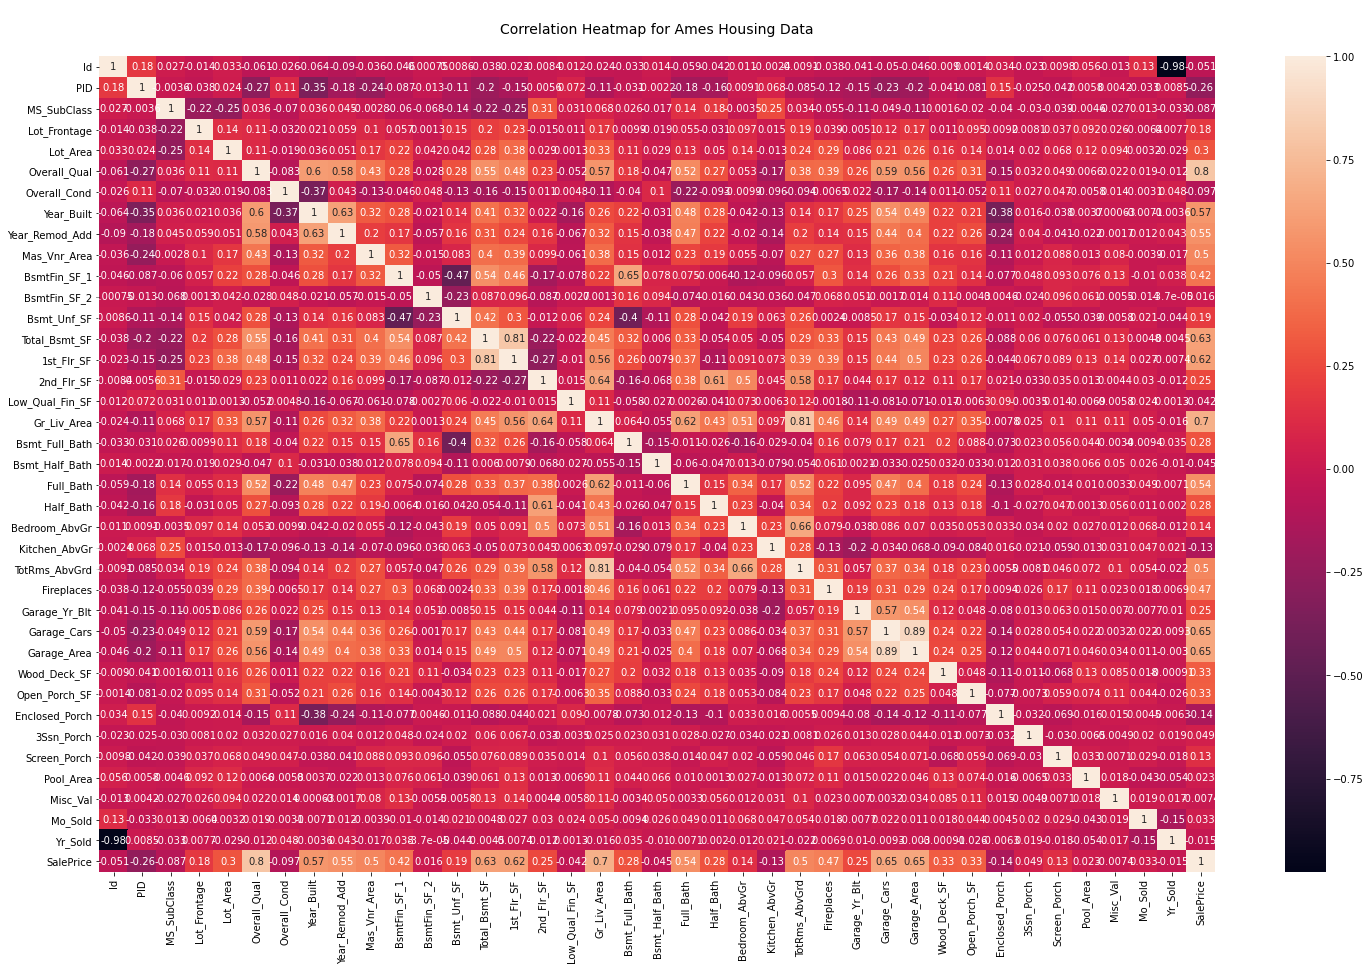

In [114]:
# visualise the correction between variables via heatmap
plt.figure(figsize=(25,15))
sns.heatmap(housing_train.corr(), annot=True)
plt.title('\nCorrelation Heatmap for Ames Housing Data\n', fontsize=14);

From the graph, we can identify there are some independent variables that have have pretty high correlation as listed below so there might be multi-collinearity. Using Lasso will help to remove feature multi-collinear features.
1. Garage_Cars and Garage_Area - 0.89 
2. TotRms_AbvGrd and Gr_Liv_Area - 0.81 
3. Garage_Yr_Blt and Year_Built - 0.73  

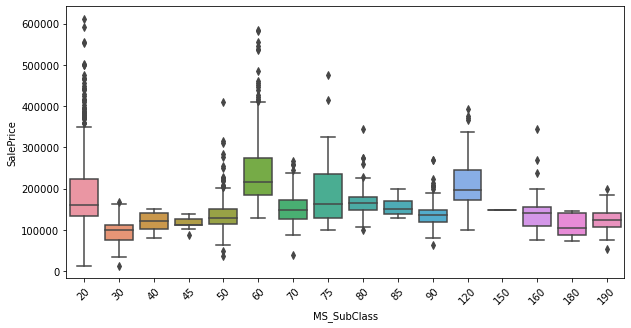

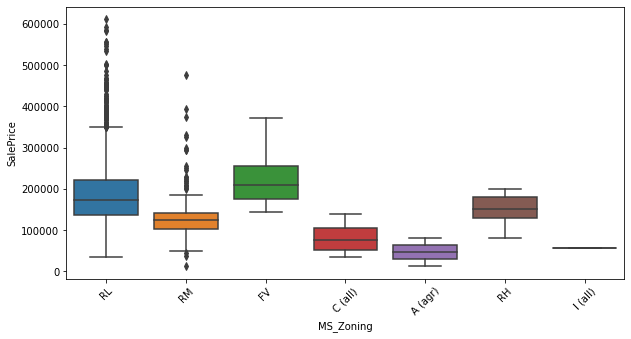

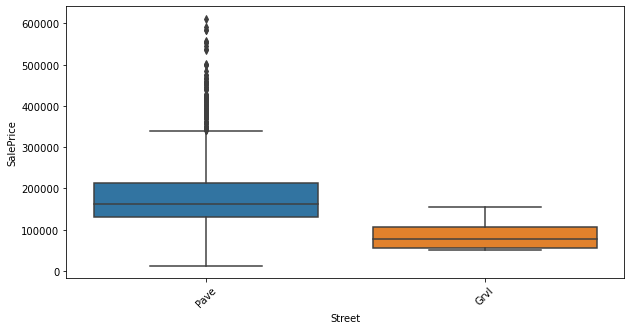

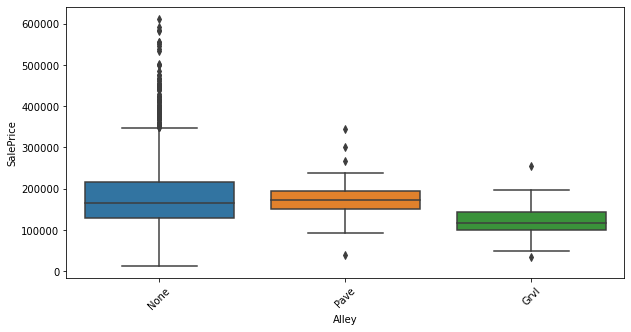

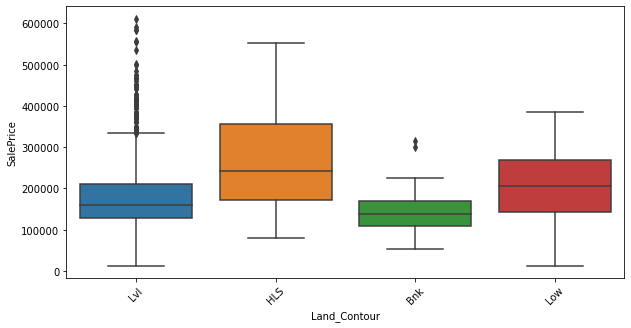

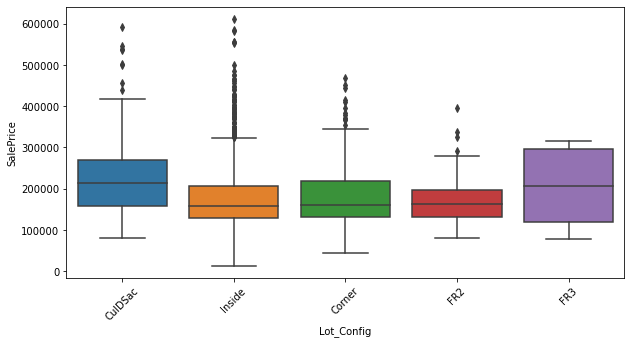

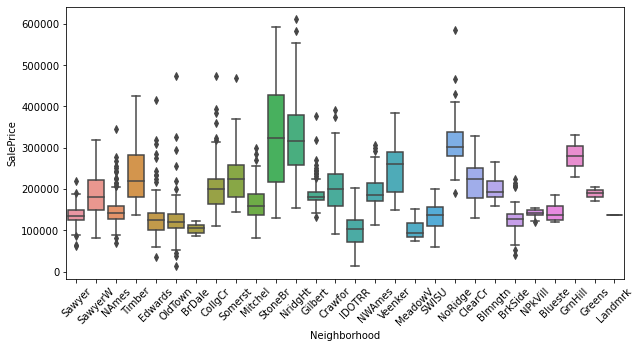

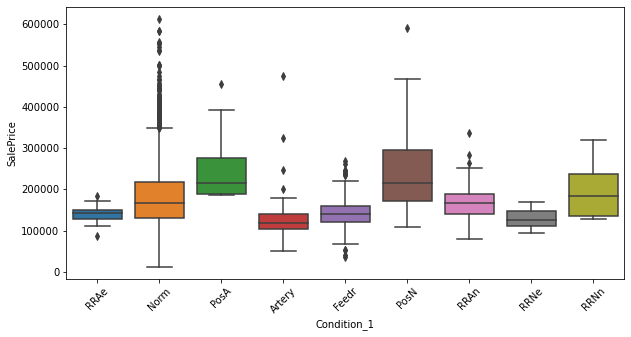

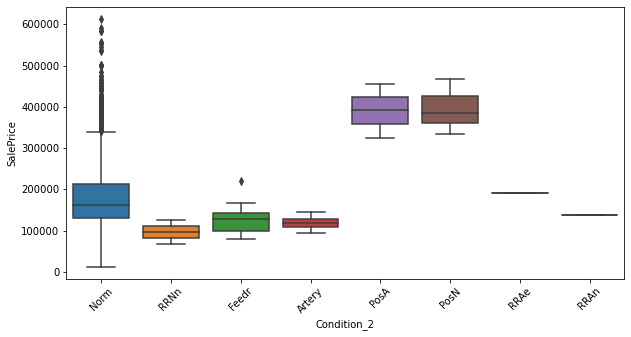

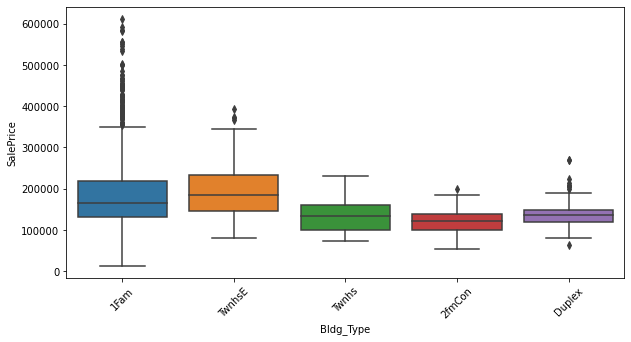

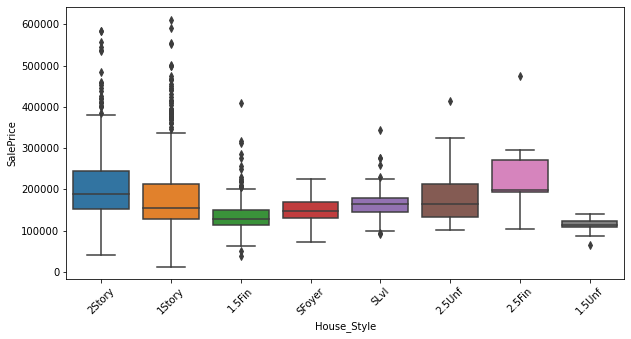

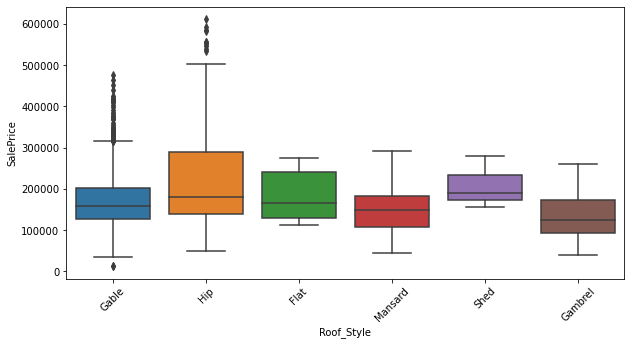

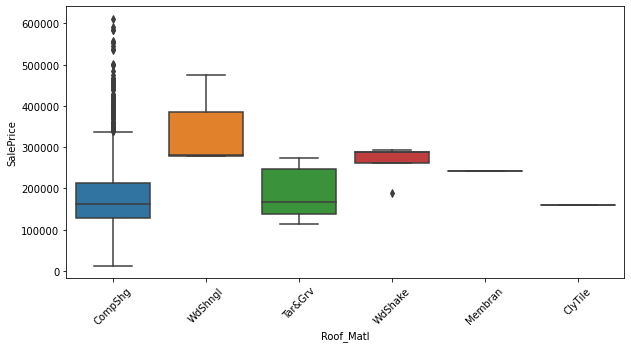

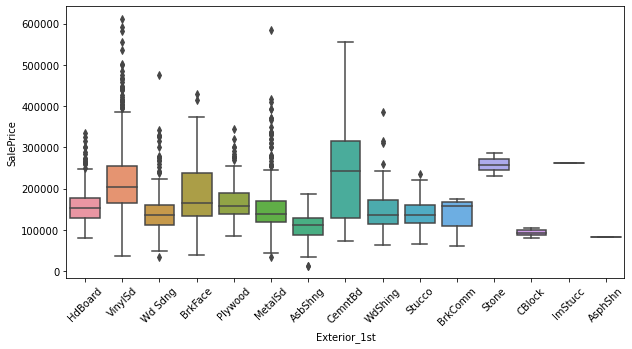

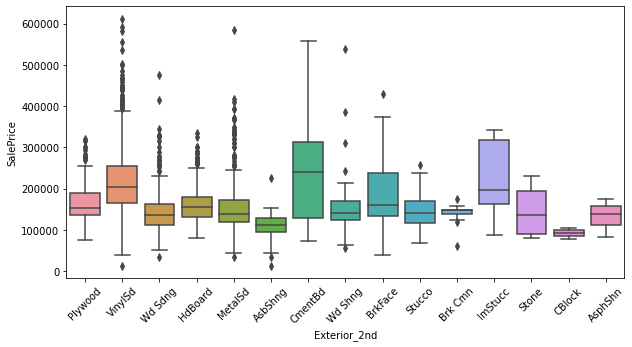

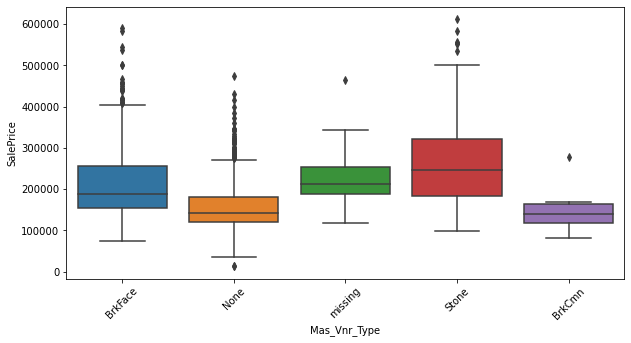

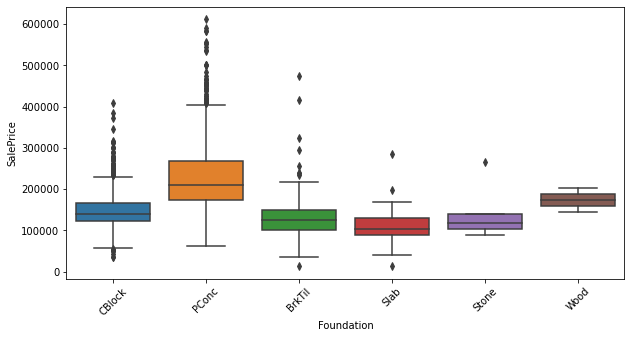

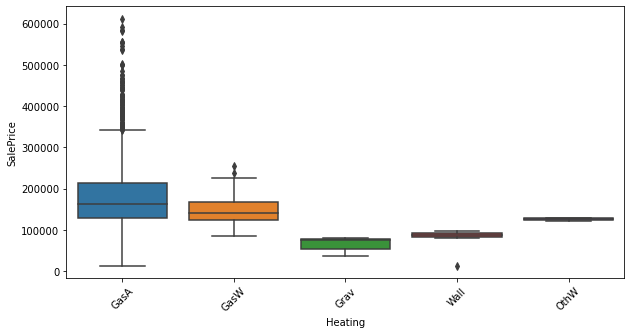

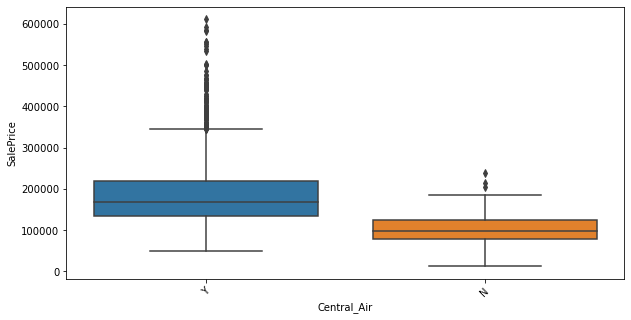

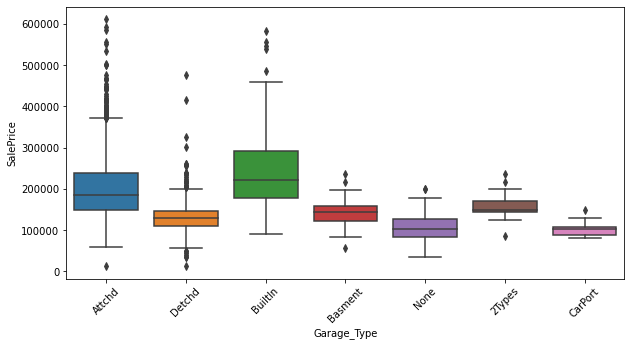

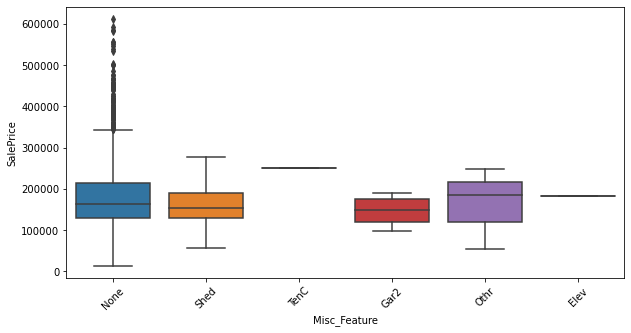

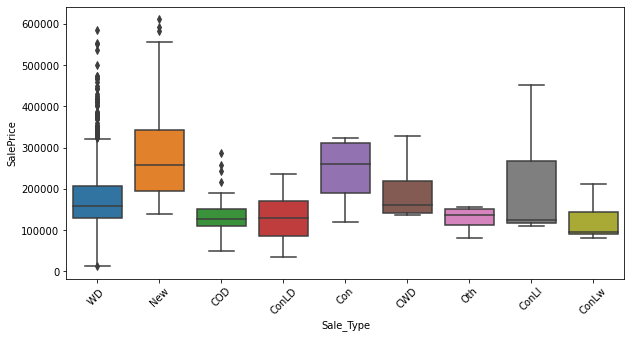

In [115]:
# plot boxplot for nominal columns except for PID
for col in nominal_columns:
    if col != 'PID':
        plt.figure(figsize = (10,5))
        sns.boxplot(x=col, y='SalePrice', data=housing_train)
        plt.xticks(rotation = 45)
        plt.show()

One similarity across all nominal variables is there's outliers. I have decided to include all outliers in my models as they are valid data points and should not be removed.<br>
Looking at the boxplots of nominal columns vs Sale Price, I observed that the median sale price for each variable within each column does not deviate too far from each other except for:
- Neighbourhood
- Condition_2
- Roof_Matl
- Exterior_1st

There are some variables that have a horizontal line instead of the usual boxplot shape, upon further checking, I noticed that there's only one value for those which has horizontal line:
- MS_SubClass: 150
- MsZoning: I(all)
- Neighbourhood: Landmrk
- Condition_2: RRae, RRAn
- Roof_Matl: Membran, ClyTile
- Exterior_1st: Imstucc, AsphShn
- Misc_Feature: TenC, Elev

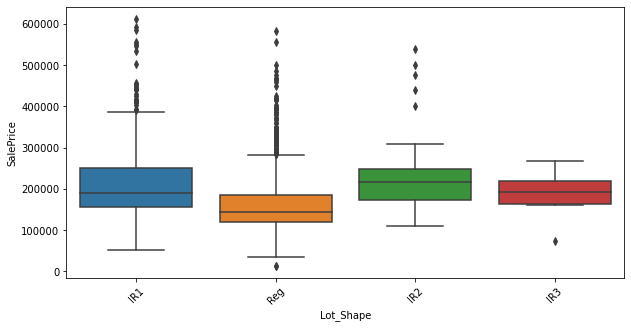

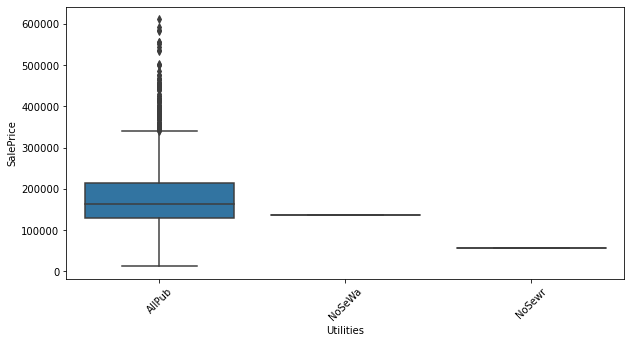

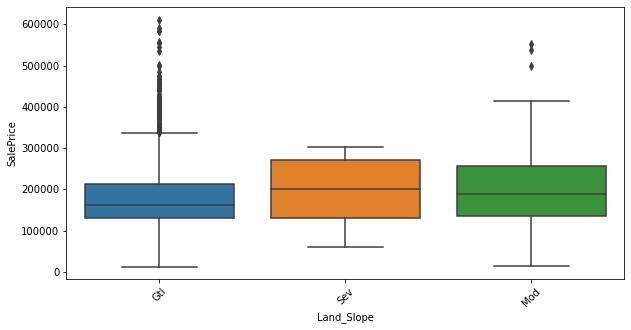

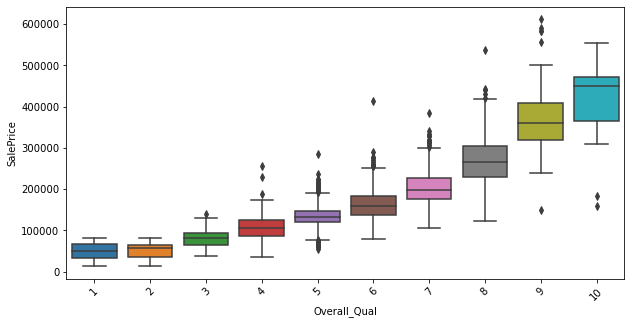

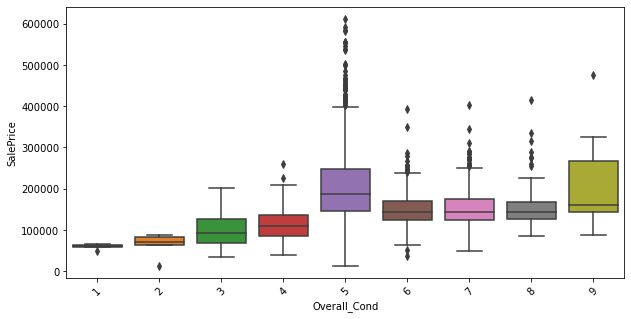

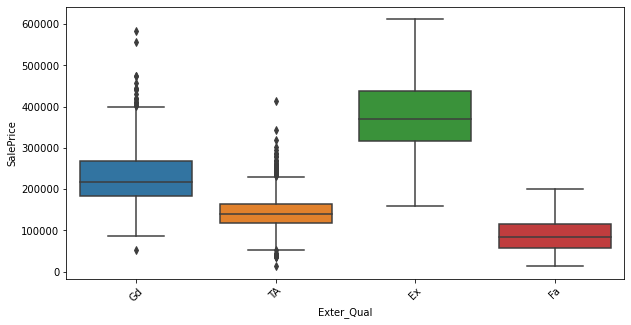

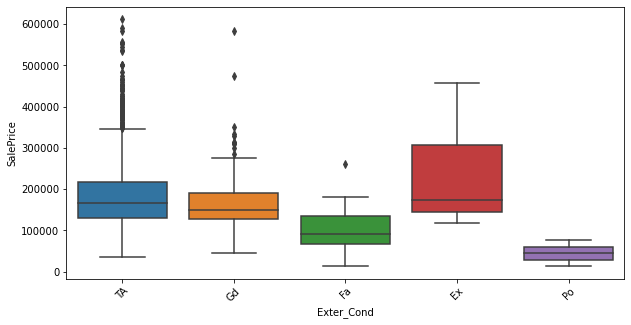

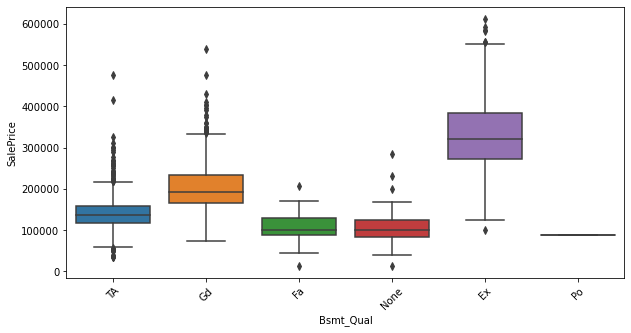

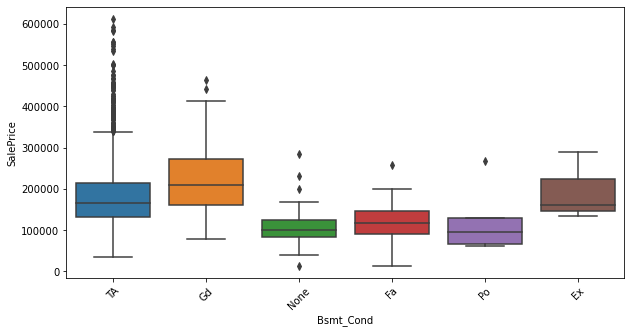

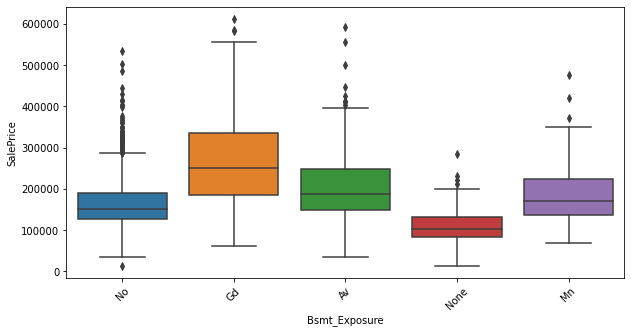

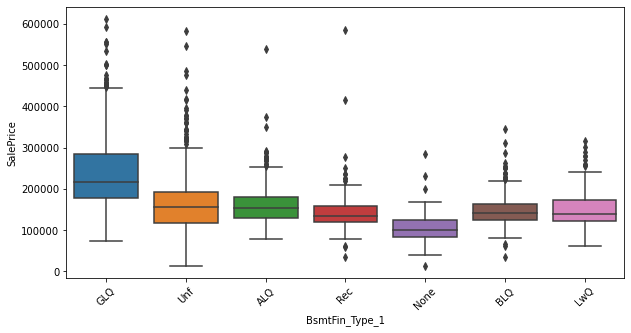

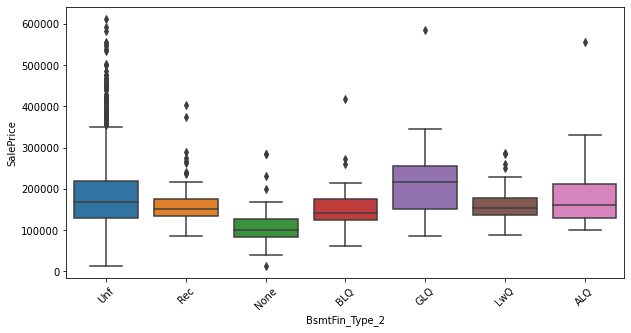

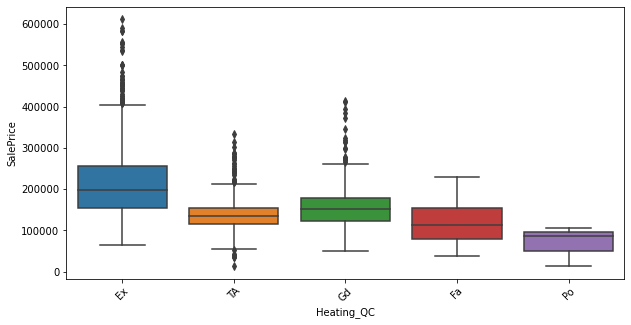

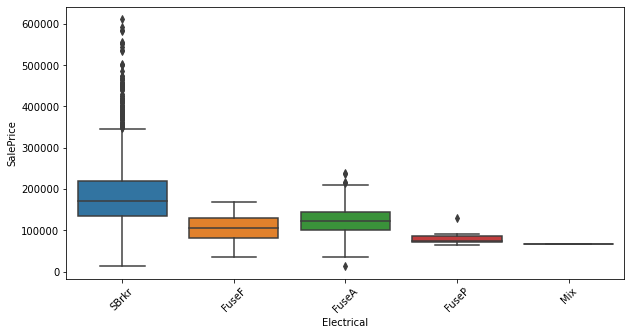

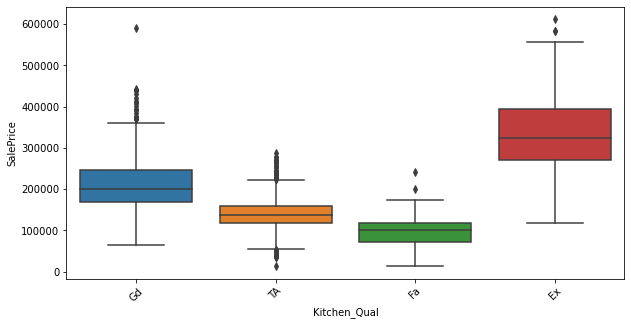

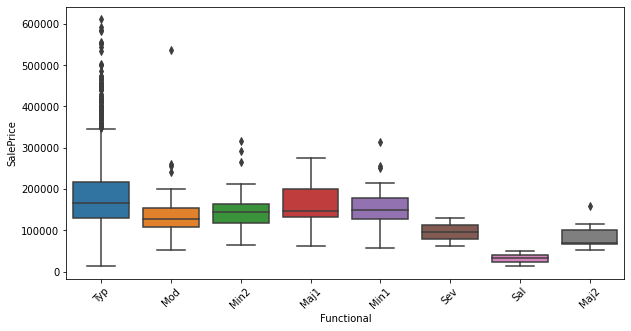

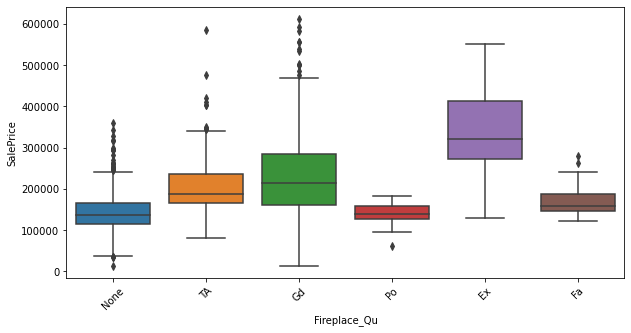

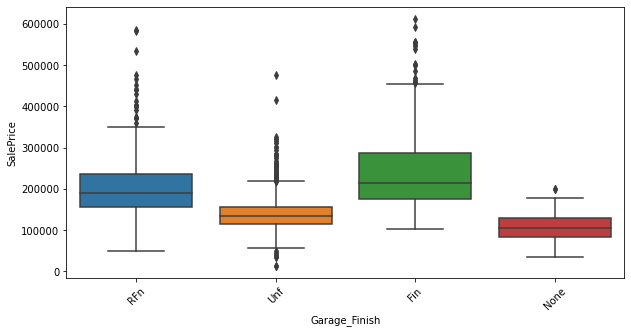

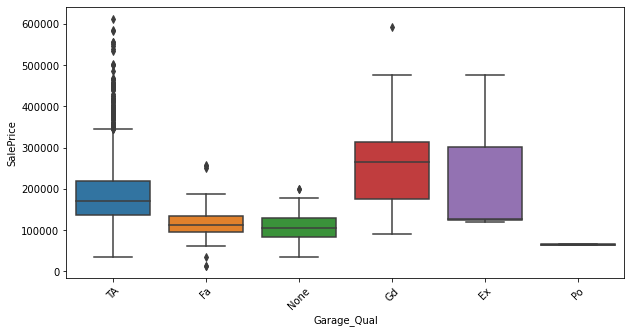

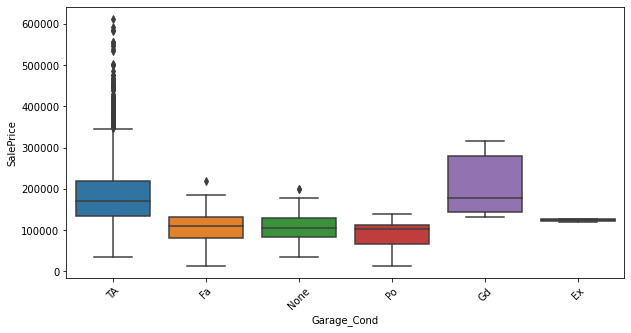

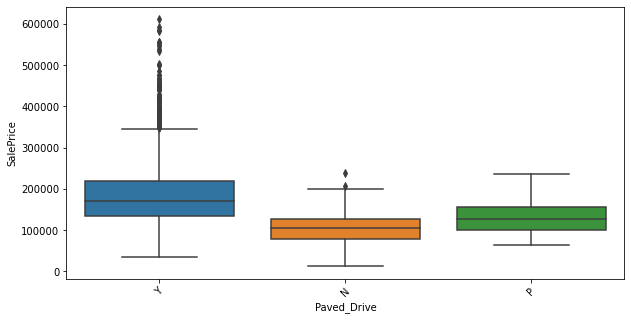

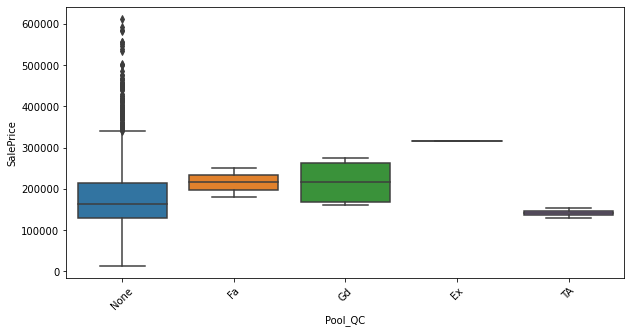

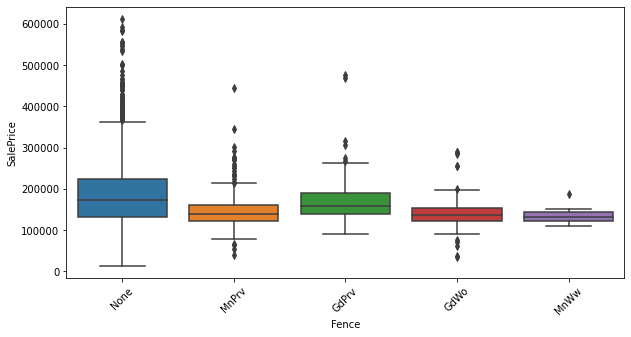

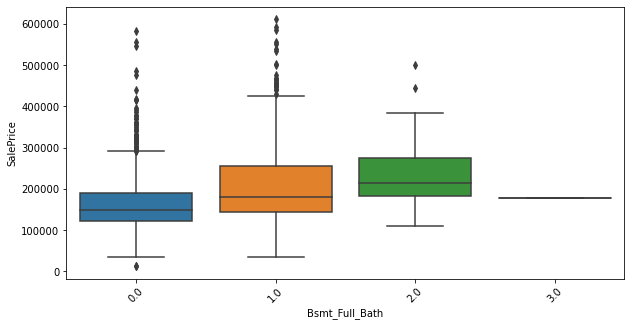

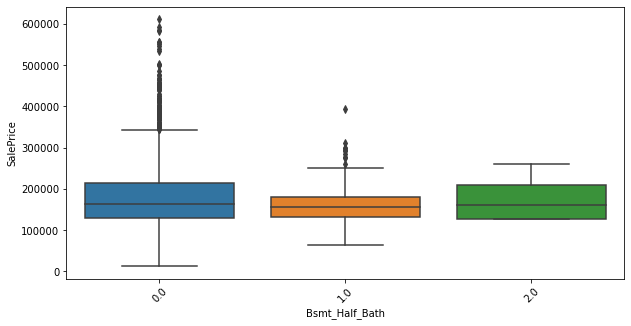

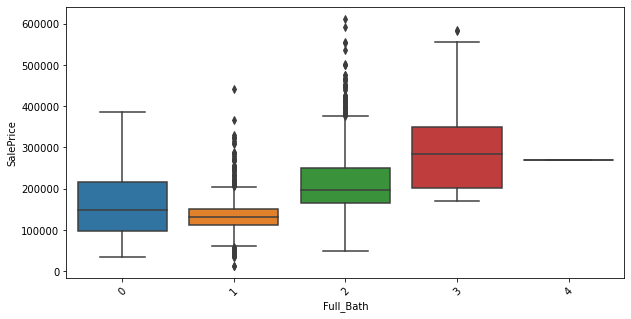

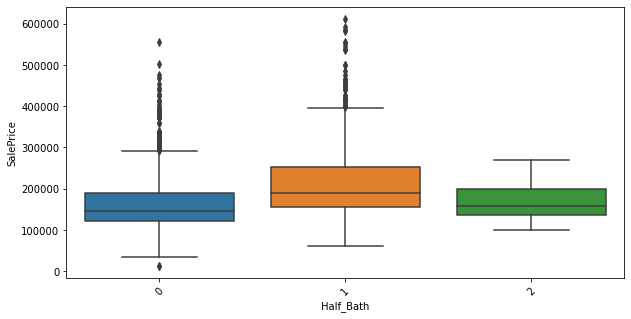

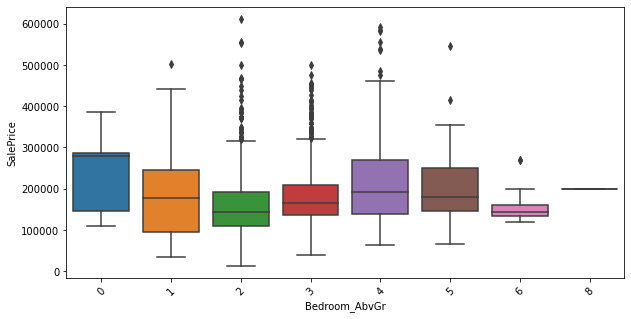

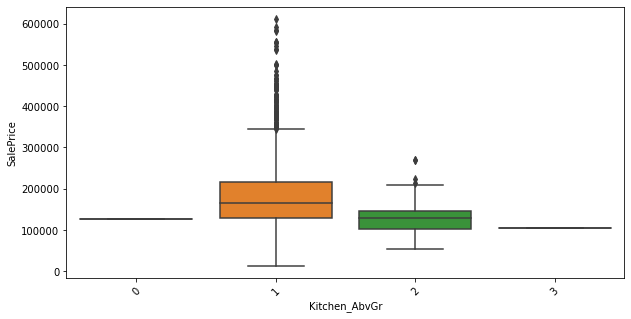

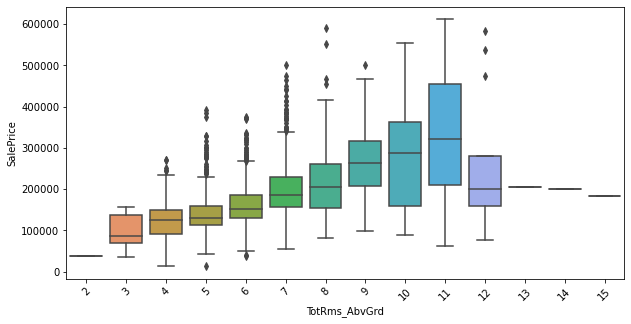

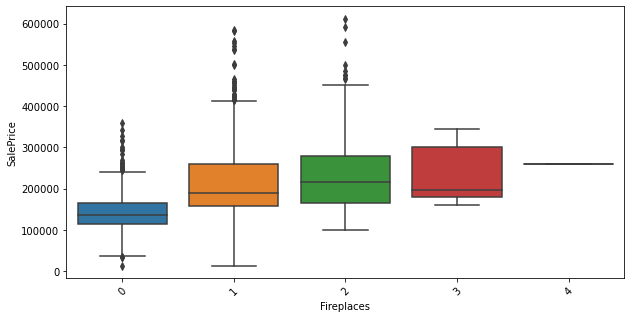

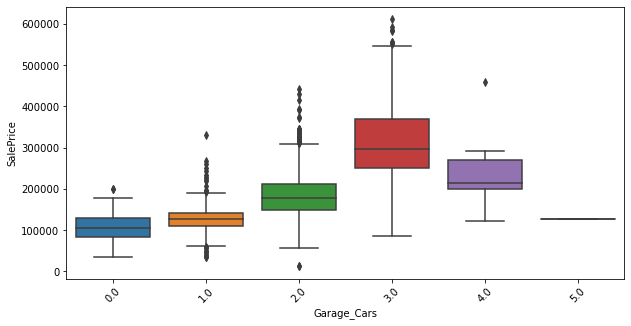

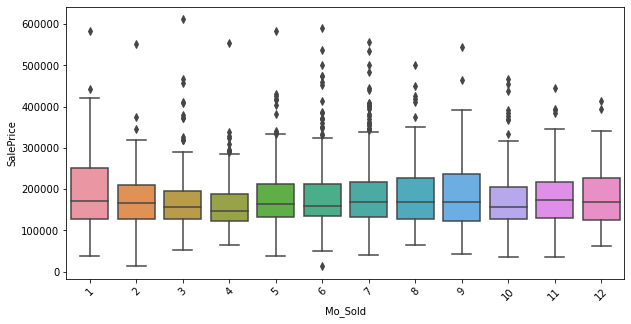

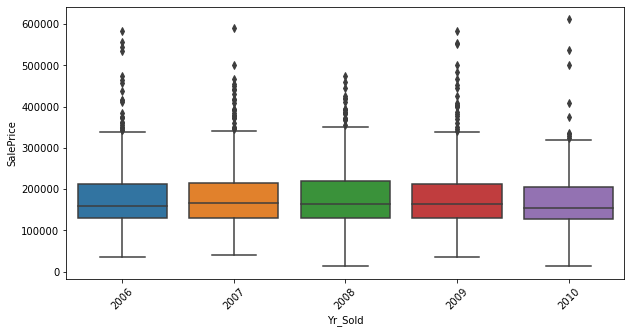

In [116]:
# plot boxplot for ordinal columns 
for col in ordinal_columns_revised:
        plt.figure(figsize = (10,5))
        sns.boxplot(x=col, y='SalePrice', data=housing_train)
        plt.xticks(rotation = 45)
        plt.show()

Looking at the boxplots for ordinal columns, I can see there's outliers for every variables as well, same as nominal. I have decided to include all outliers in my models as they are valid data points and should not be removed.<br>
Most columns have median that does not deviate too far from each other except for:
- Overall_Qual
- Exter_Qual
- Bsmt_Qual
- Kitchen_Qual
- Fireplace_Qual
- Garage_Qual
- Full_Bath
- TotRms_AbvGrd
- Garage_Cars


There are some variables that have a horizontal line instead of the usual boxplot shape, upon further checking, I noticed these are the features that have one value for the sub-category:
- Utilities: 
    - NoSeWa(Electricity, Gas, and Water (Septic Tank))
    - NoSewr(Electricity and Gas Only)
- Bsmt_Qual: Poor
- Electrical: Mix
- Bedroom_AbvGr: 8
- Kitchen_AbvGr: 3
- TotRms_AbvGrd: 2, 13, 14, 15
- Fireplaces: 4
- Garage_Cars: 5

And these are the featues that appear as a horizontal line but there's 2 values, and that's because the SalePrice is the same:
- Garage_Qual: Poor
- Bsmt_Full_Bath: 3.0
- Full_Bath: 4
- Kitchen_AbvGr: 0

For Overall_Qual, it's interesting to see there's a positive correlation between the values and SalePrice. As the number increases, SalePrice increases. This is probably explained by having higher overall quality will mean higher price, which is true based on my knowledge.

For TotRms_AbvGrd, there's a similar trend as well whereby the SalePrice increases with the number of rooms in the house but the maximum median reaches when the number of rooms is 11 then it decreases from there. This is probably due to buyers are only willing to pay for up to 11 rooms. And maybe because if there are so many rooms in the house, the size of other areas such as living room, kitchen etc might be smaller than expected.

Bsmt_Full_Bath, Full_Bath, Fireplaces, Garage_Cars also seem to have a positive linear SalePrice as well. As the number increases, SalePrice increases as well.

For Mo_Sold and Yr_Sold, I observed that the median remains the same throughout, therefore, these two variables probably do not have much influence on SalePrice.

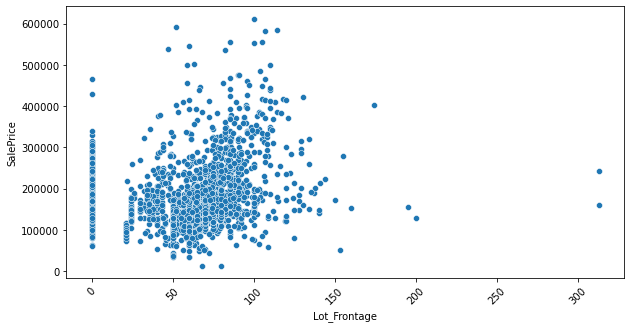

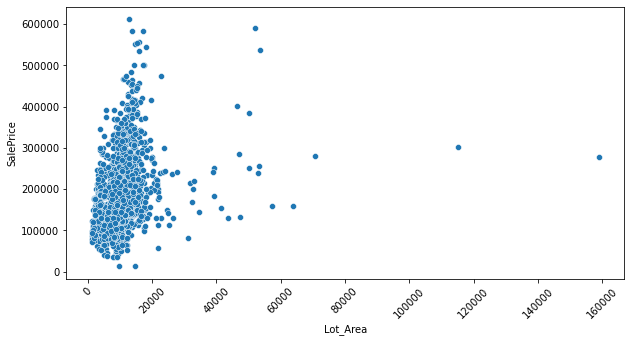

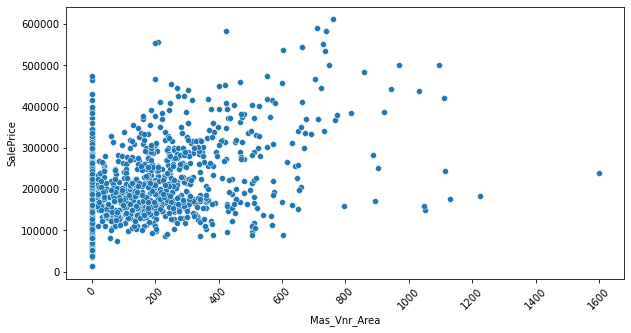

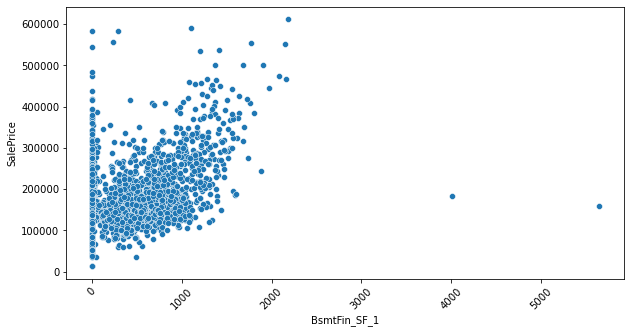

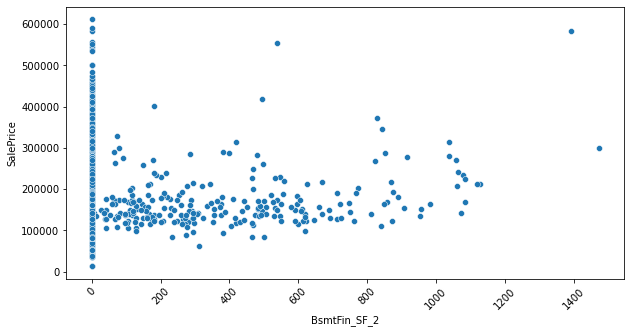

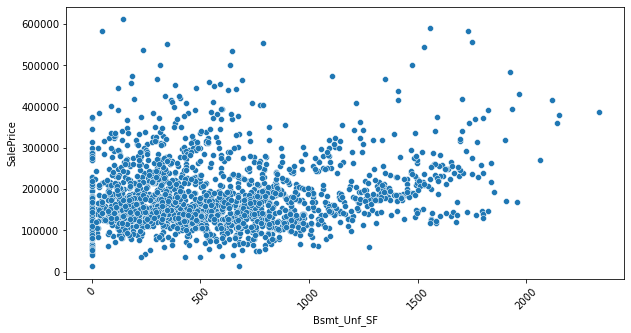

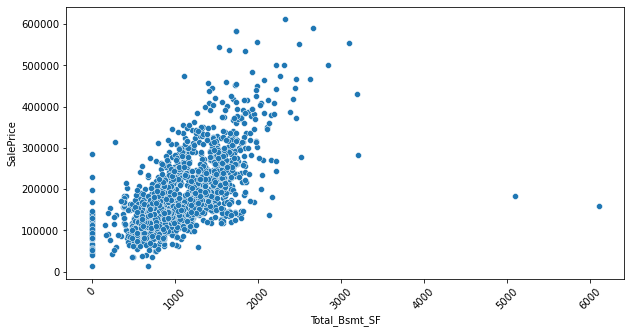

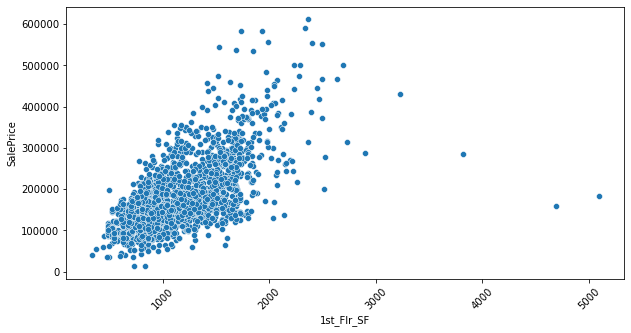

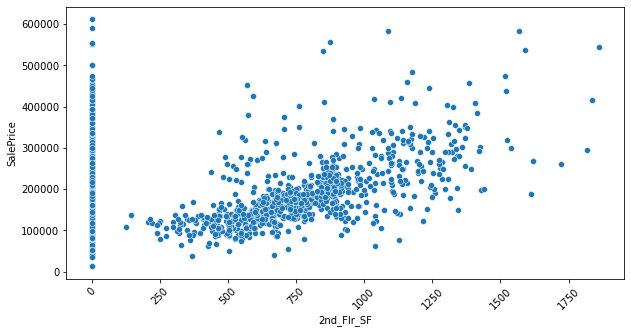

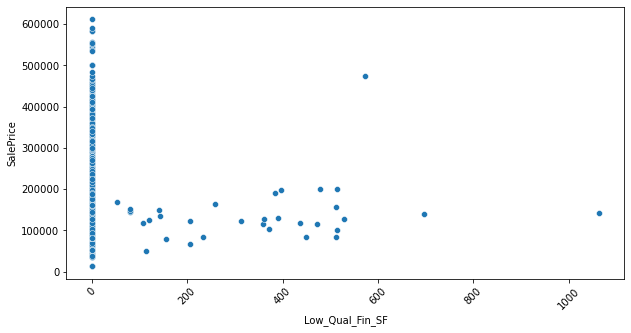

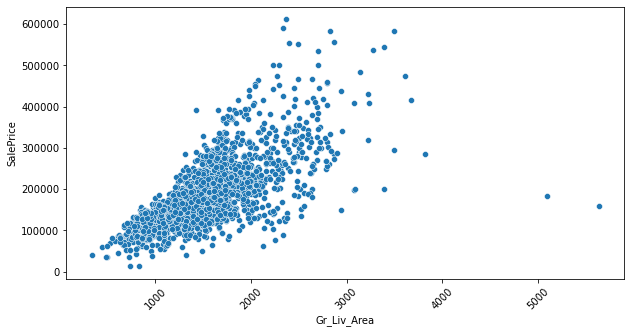

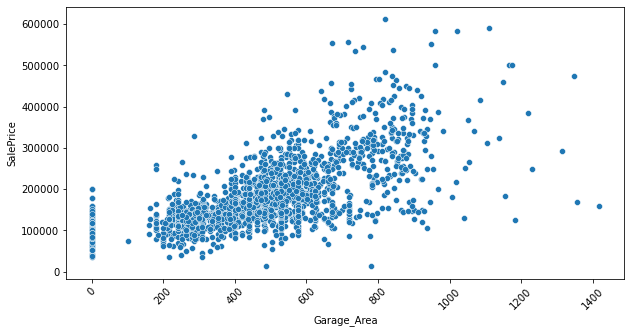

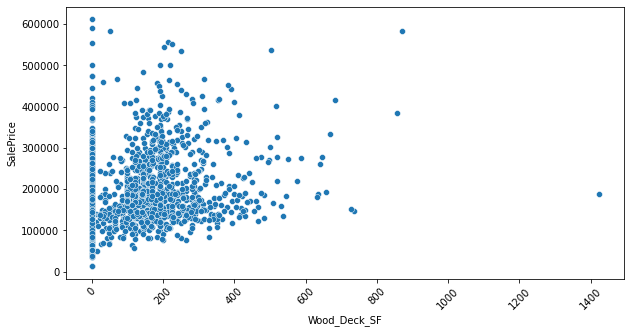

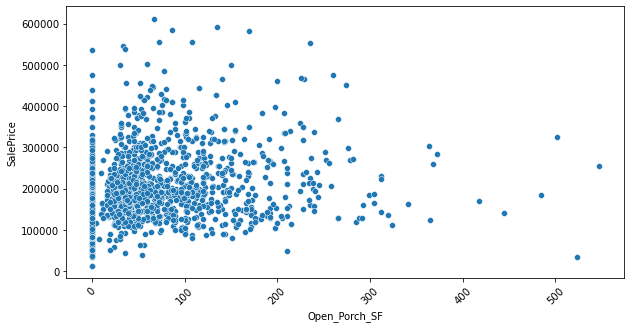

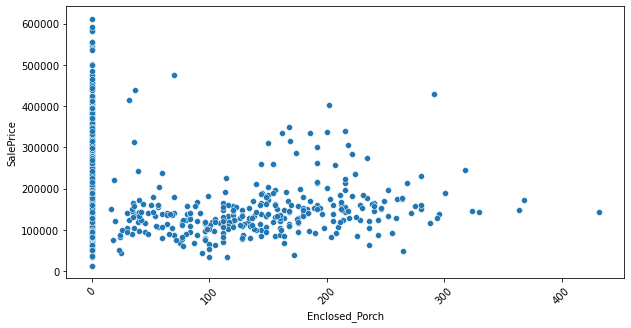

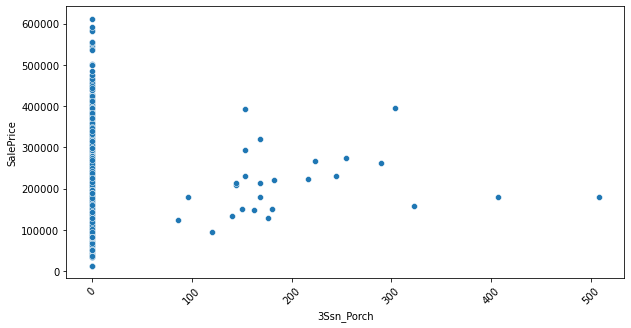

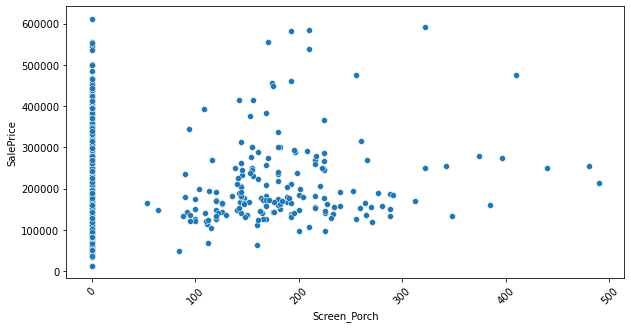

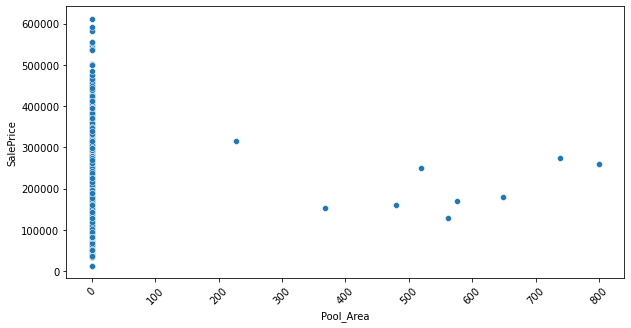

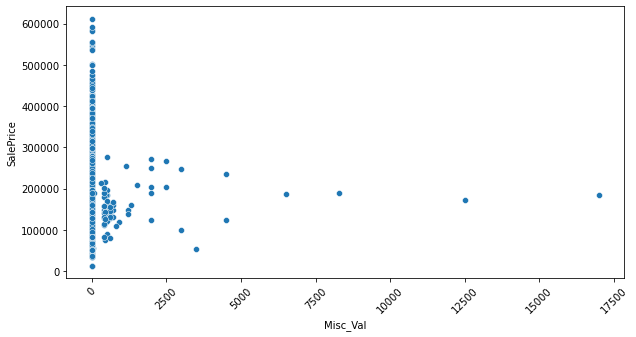

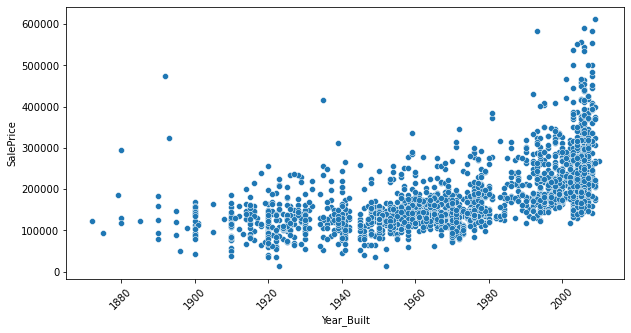

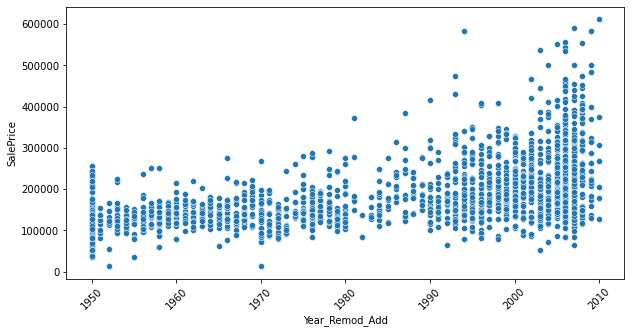

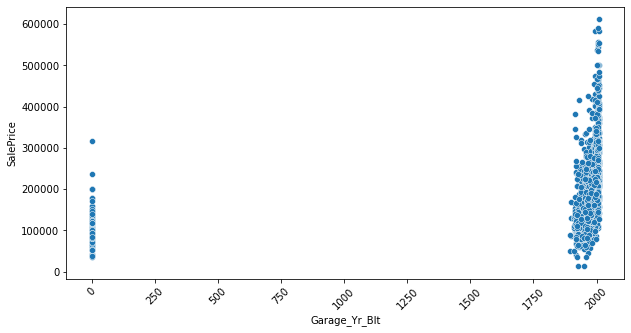

In [117]:
# plot scatterplots for nominal columns except for SalePrice to check the relationship
for col in continuous_columns_revised:
    if col != 'SalePrice':
        plt.figure(figsize = (10,5))
        sns.scatterplot(x=col, y='SalePrice', data=housing_train)
        plt.xticks(rotation = 45)
        plt.show()

For continuous columns, I would explore the outliers and the relationship with SalePrice. I have decided to include all outliers in my models as they are valid data points and should not be removed.<br>
Below, I will explore the extreme outliers:
- **Lot_Frontage**: 2 outliers. There seems to be a positive correlation with SalePrice
- **Lot_Area**: 2 outliers. It doesn't seem to have any correlation with SalePrice.
- **Mas_Vnr_Area**: 1 outlier. There seems to be a positive linear correlation with SalePrice though there's quite a number of zero values.
- **BsmtFin_SF_1**: 2 outliers. There seems to be quite a steep positive correlation with SalePrice.
- **BsmtFin_SF_2**: 1 outlier. There's no correlation with SalePrice.
- **Bsmt_Unf_SF**: No outlier and it doesn't seem to have a correlation with SalePrice.
- **Total_Bsmt_SF**: 2 outliers aand there's a positive linear correlation with SalePrice.
- **1st_Flr_SF**: 2 outliers and there's a positive correlation with SalePrice.
- **2nd_Flr_SF**: No obvious outliers and there's a positive correlation with SalePrice.
- **Low_Qual_Fin_SF**: 3 outliers and many have zero values. There's no correlation with SalePrice as most are zero values.
- **Gr_Liv_Area**: 2 outliers and there's a positive linear correlation with SalePrice.
- **Garage_Area**: No obvious outliers other than those which has zero values, there's a positive linear correlation with SalePrice.
- **Wood_Deck_SF**: 1 outlier and there seems to be a positive linear correlation with SalePrice.
- **Open_Porch_SF**: No obvious outliers other than the zero values. There seems to be a mild positive correlation with Saleprice.
- **Enclosed_Porch**: 1 outlier and no correlation with SalePrice.
- **3Ssn_Pouch, Screen_Porch, Pool_Area, Misc_Val**: Values are pretty scattered/scattered with most having zero values. There's no correlation with SalePrice.
- **Year_Built, Year_Remod_Add**: There's no obvious outliers and there's a positive linear correlation with SalePrice
- **Garage_Yr_Blt**: As I have impute '0' value for Garage_Yr_Blt, most of the distribution is now cluttered towards the right. But before the '0' value is imputed, there's a distint positive linear relationship with saleprice

## Conclusions and recommendations

Based on my modelling above, I conclude that Lasso and Ridge regression after feature engineering is the best model to predict the sale price. 
Lasso helps to eliminate unimportant features and narrow down the features that do affect sale price, with coefficients stating how much do they positively and negatively influence sale price. <br><br>
Creation of new features help to provide insights whether interaction features might influence sale price and in this case, it did influence sale price. <br><br>
Looking at the Ridge coefficients dataframe, I can conclude that these are some of the key factors that will influence sale price:
1. Ground living area * Overall Quality
2. Ground living area * Kitchen Quality
3. Overall Quality * External Quality
4. Neighbourhood - Northridge Heights and Stone Brooke
5. Basement Type 1 finished square feet
6. Total Basement square feet

These are the variables that will negatively affect sale price:
1. Roof Material - ClayTile
2. Misc Feature - Elevator

I would recommend home buyers to improve the house overall quality, kitchen quality and exterior quality by doing minor renovation or painting to their house if the current state is not of a good quality. <br><br>
Based on the dataframe above, the top 3 variables are interaction features which mean a combination of Ground living area & Overall Quality, Ground living area & Kitchen Quality and Overall Quality & External Quality respectively have a significant positive impact on the sale price. For Ground living area, there's not much homeowners can do about it since the area/square feet is fixed but at least it gives homeowner a base idea of how much their house will cost. <br><br>
If minor renovation or painting that does not cost much can do the trick, homeowners can consider doing that in order to fetch a higher price in the market. Otherwise, if the cost of renovation or painting outweight the increase in sale price of the house, home owners might want to reconsider this option.<br><br>
For houses in Northridge Heights and Stone Brooke neighbourhoods, homeowners can expect their house to fetch a higher price. 
Northridge Heights and is a family-friendly neighbourfood with many amenities nearby that is within walking distance. Also, it is in the thriving Gilbert School District.<br>
Stone Brooke is located nearby of the Iowa State University campus and a shopping mall. And all residents are free to use amenities such as swimming pool and club house and there's even amonthly potluck lunch as well. 
Perhaps, the characteristics of these two neighbourhood help to influence the sale price as the amenities are pretty attractive for both individuals and families.

Looking at variables that affect the sale price negatively that is Roof material made of ClayTile and Misc Feature - Elevator, homeowners that have either these two variables would need to be prepared that their house would not be able to fetch a good sale price. Based on the dataset, it seems like very few houses in Ames has roof material made of ClayTile or has an elevator as there's only one house that has each variable so perhaps most home owners would not have to worry about. But in the event that if the house has either variable, they would need to take note the variable would hurt the sale price. They may want to consider changing the roof material / removing the elevator for a better sale price depending on the difference in sale price it can fetch.

For Propnex, the company can use the model to provide consulting services to advise homeowners what's the sale price of their house and recommend the key areas they can focus on to increase sale price. 

To further improve my models, I will consider removing the extreme outliers and create more interaction features to see if the r2 score and cross validation score can be further increased and be of very close values. 